In [53]:
import pandas as pd
import numpy as np
import time
import pymysql
from sshtunnel import SSHTunnelForwarder
import matplotlib.pyplot as plt

In [2]:
mysql_configure = pd.read_csv("Y:/Yuan/temp/mysql_connection.csv",index_col=0)

In [3]:
sql_hostname = mysql_configure.loc["sql_hostname",]["value"]
sql_username = mysql_configure.loc["sql_username",]["value"]
sql_password = mysql_configure.loc["sql_password",]["value"]
sql_main_database = mysql_configure.loc["sql_main_database",]["value"]
sql_port = mysql_configure.loc["sql_port",]["value"]
ssh_host = mysql_configure.loc["ssh_host",]["value"]
ssh_user = mysql_configure.loc["ssh_user",]["value"]
ssh_password = mysql_configure.loc["ssh_password",]["value"]
ssh_port = mysql_configure.loc["ssh_port",]["value"]

In [7]:
with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
    print('SSH connected')
    conn = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
    try:
        with conn as cursor: #auto commit; no close() called
            with cursor: # close() called here
                sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s "
                sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1=s.Seq and da.Res_1 = \"SER\" and da.Res_2 = \"HIS\";"    
                sql = sql_select+sql_where
                data = pd.read_sql_query(sql, conn)

    except Exception as e: # catch exceptions
        print("~~~~~~~~~~~~~~")
        print(e)
    finally:
        if conn:
            conn.close()


SSH connected


In [150]:
def Two_active_residues_retrieval(residue_1,residue_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1=s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2=s2.Seq and da.Res_2 = \"{}\" ;".format(residue_1,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1=s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2=s2.Seq and da.Res_2 = \"{}\" ;".format(residue_2,residue_1)    
                        sql = sql_select+sql_where
                        data_2 = pd.read_sql_query(sql, conn)                        
                        data = pd.concat([data_1,data_2])
                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)

def Two_nonactive_residues_retrieval(residue_1,residue_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 != s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 != s2.Seq and da.Res_2 = \"{}\" ;".format(residue_1,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 != s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 != s2.Seq and da.Res_2 = \"{}\" ;".format(residue_2,residue_1)    
                        sql = sql_select+sql_where
                        data_2 = pd.read_sql_query(sql, conn)                        
                        data = pd.concat([data_1,data_2])
                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)

def Active_nonactive_residues_retrieval(residue_1,residue_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 = s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 != s2.Seq and da.Res_2 = \"{}\" ;".format(residue_1,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 != s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 = s2.Seq and da.Res_2 = \"{}\" ;".format(residue_2,residue_1)    
                        sql = sql_select+sql_where
                        data_2 = pd.read_sql_query(sql, conn)                        
                        data = pd.concat([data_1,data_2])
                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)

def Nonactive_active_residues_retrieval(residue_1,residue_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 != s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 = s2.Seq and da.Res_2 = \"{}\" ;".format(residue_1,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 = s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 != s2.Seq and da.Res_2 = \"{}\" ;".format(residue_2,residue_1)    
                        sql = sql_select+sql_where
                        data_2 = pd.read_sql_query(sql, conn)                        
                        data = pd.concat([data_1,data_2])
                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)

def Two_all_residues_retrieval(residue_1,residue_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.Res_1 = \"{}\" and da.Res_2 = \"{}\" ;".format(residue_1,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
                        sql_where = "WHERE da.Res_1 = \"{}\" andda.Res_2 = \"{}\" ;".format(residue_2,residue_1)    
                        sql = sql_select+sql_where
                        data_2 = pd.read_sql_query(sql, conn)                        
                        data = pd.concat([data_1,data_2])
                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)



def Two_residues_generic_retrieval(residue_1,residue_2,active_1,active_2):
    data, data_1, data_2 = None, None, None
    with SSHTunnelForwarder(
        (ssh_host, int(ssh_port)),
        ssh_username=ssh_user,
        ssh_password=ssh_password,
        remote_bind_address=('127.0.0.1', int(sql_port))) as tunnel:
            print('SSH connected')
            conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                    passwd=sql_password, db=sql_main_database,
                    port=tunnel.local_bind_port)
            try:
                with conn as cursor: #auto commit; no close() called
                    with cursor: # close() called here
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s,pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 {} s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 {} s2.Seq and da.Res_2 = \"{}\" ;".format(active_1,residue_1,active_2,residue_2)    
                        sql = sql_select+sql_where
                        data_1 = pd.read_sql_query(sql, conn)
                        sql_select = "Select da.* FROM pdbdb.Distance_angle da, pdbdb.Site s, pdbdb.Site s2 "
                        sql_where = "WHERE da.pdbID = s.pdbID and da.chain = s.chain and da.ID_1 {} s.Seq and da.Res_1 = \"{}\" and da.pdbID = s2.pdbID and da.chain = s2.chain and da.ID_2 {} s2.Seq and da.Res_2 = \"{}\" ;".format(active_2,residue_2,active_1,residue_1)    
                        sql = sql_select+sql_where
                        data_2 = pd.read_sql_query(sql, conn)                        
                        data = pd.concat([data_1,data_2])
                    
            except Exception as e: # catch exceptions
                print("~~~~~~~~~~~~~~")
                print(e)
            finally:
                if conn:
                    conn.close()
    return(data)

In [148]:
active_data = Two_residues_generic_retrieval("HIS","SER","!=","!=")
active_data = active_data[active_data["Distance"]<17]

SSH connected


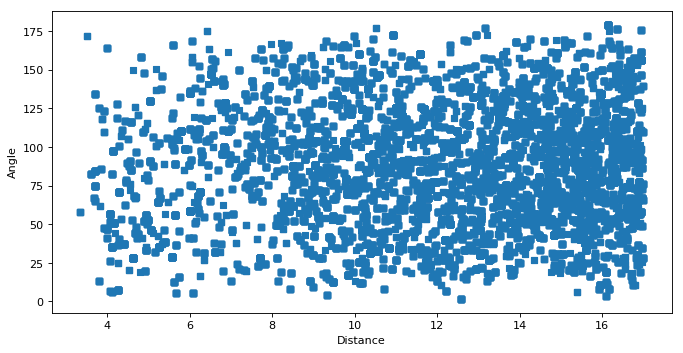

In [149]:
plt.figure(figsize = (10,5),dpi=80)

plt.scatter(active_data["Distance"],active_data["Angle"],
           marker = "s")


#plt.legend(["ASP_Neg","ASP_Pos","HIS_Neg","His_Pos"])

plt.xlabel("Distance")
plt.ylabel("Angle")

#plt.title("Active {} vs {}".format(residue1,residue2))
#plt.savefig("Active {} vs {}.png".format(residue1,residue2),dpi=300, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)

plt.show()

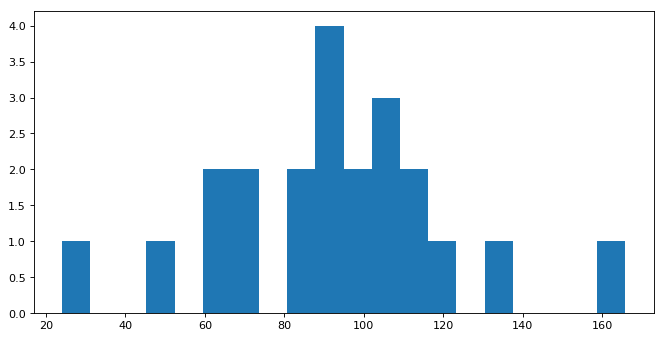

In [137]:
plt.figure(figsize = (10,5),dpi=80)
plt.hist([float(x) for x in active_data["Angle"]], bins=20)
#plt.title("Active {} vs {} angle".format(residue1,residue2))
#plt.savefig("Active {} vs {} angle.png".format(residue1,residue2),dpi=300, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)
plt.show()

In [140]:
nonactive_data = Two_nonactive_residues_retrieval("HIS","SER")
nonactive_data = nonactive_data[nonactive_data["Distance"]<17]

SSH connected


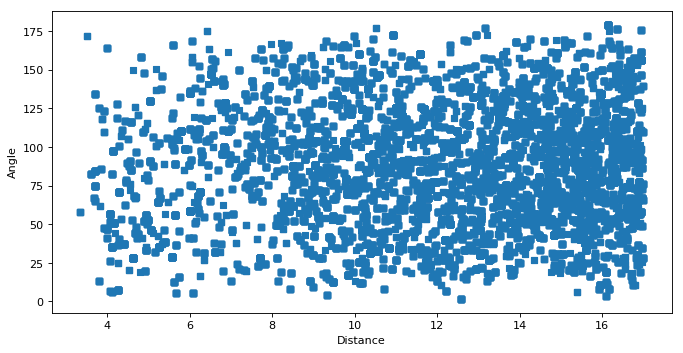

In [141]:
plt.figure(figsize = (10,5),dpi=80)

plt.scatter(nonactive_data["Distance"],nonactive_data["Angle"],
           marker = "s")


#plt.legend(["ASP_Neg","ASP_Pos","HIS_Neg","His_Pos"])

plt.xlabel("Distance")
plt.ylabel("Angle")

#plt.title("Active {} vs {}".format(residue1,residue2))
#plt.savefig("Active {} vs {}.png".format(residue1,residue2),dpi=300, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)

plt.show()

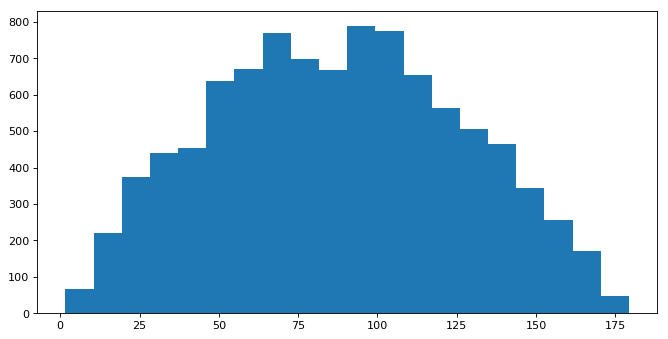

In [95]:
plt.figure(figsize = (10,5),dpi=80)
plt.hist([float(x) for x in nonactive_data["Angle"]], bins=20)
#plt.title("Active {} vs {} angle".format(residue1,residue2))
#plt.savefig("Active {} vs {} angle.png".format(residue1,residue2),dpi=300, facecolor='w', edgecolor='w',
#        orientation='portrait', papertype=None, format=None,
#        transparent=False, bbox_inches=None, pad_inches=0.1,
#        frameon=None, metadata=None)
plt.show()

SSH connected
SSH connected
SSH connected
SSH connected


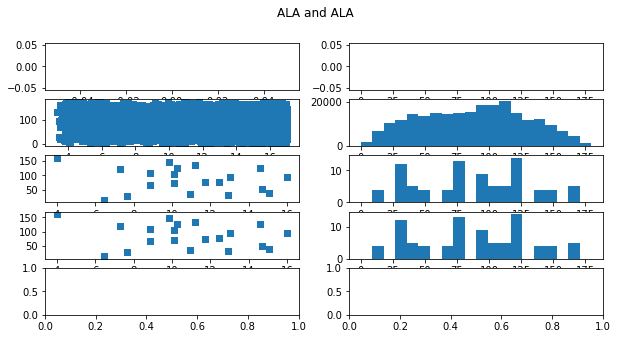

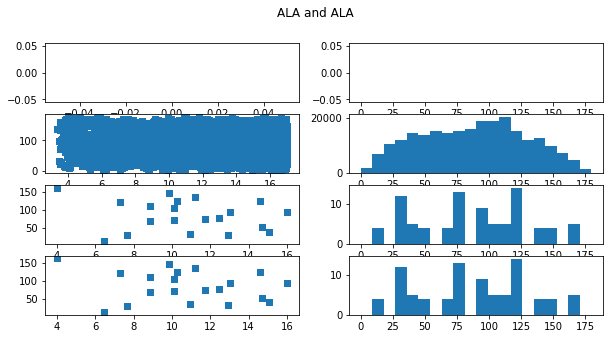

SSH connected
SSH connected
SSH connected
SSH connected


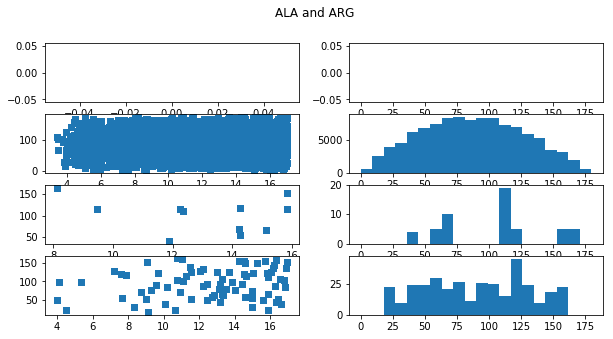

SSH connected
SSH connected
SSH connected
SSH connected


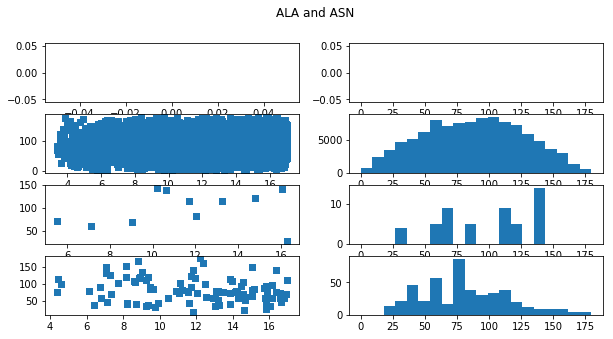

SSH connected
SSH connected
SSH connected
SSH connected


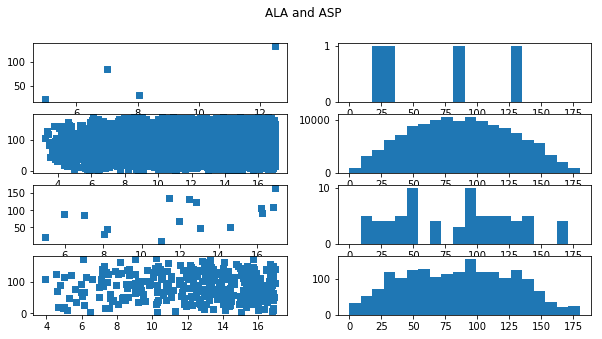

SSH connected
SSH connected
SSH connected
SSH connected


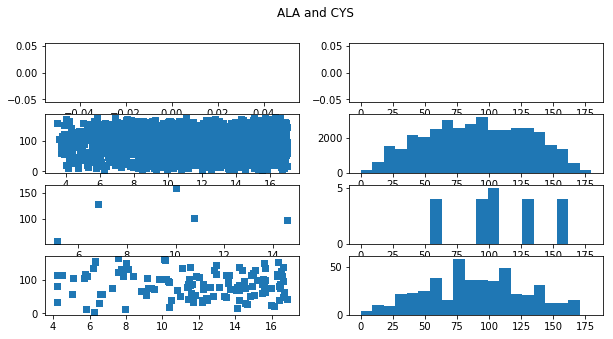

SSH connected
SSH connected
SSH connected
SSH connected


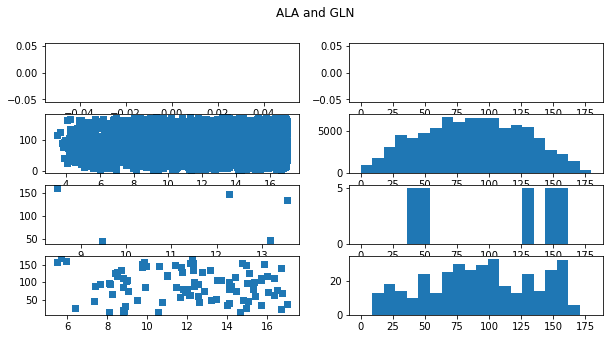

SSH connected
SSH connected
SSH connected
SSH connected


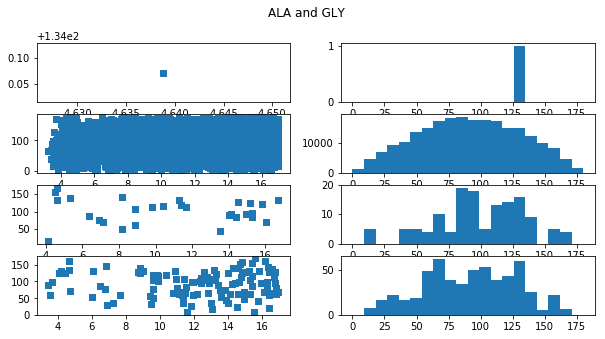

SSH connected
SSH connected
SSH connected
SSH connected


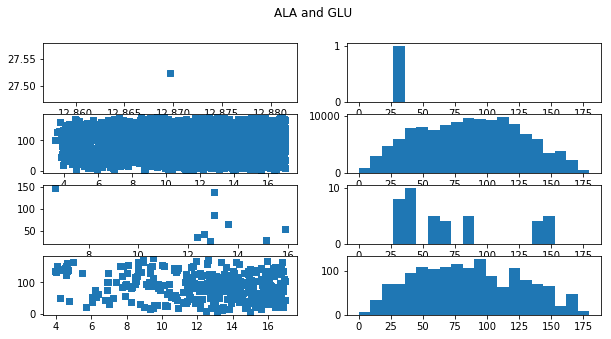

SSH connected
SSH connected
SSH connected
SSH connected


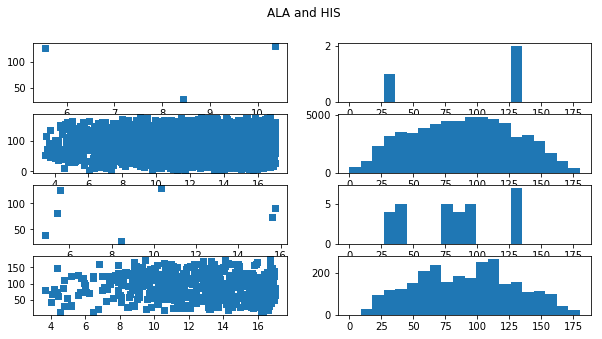

SSH connected
SSH connected
SSH connected


2019-09-30 21:03:18,629| ERROR   | Could not establish connection from ('127.0.0.1', 63484) to remote side of the tunnel


SSH connected


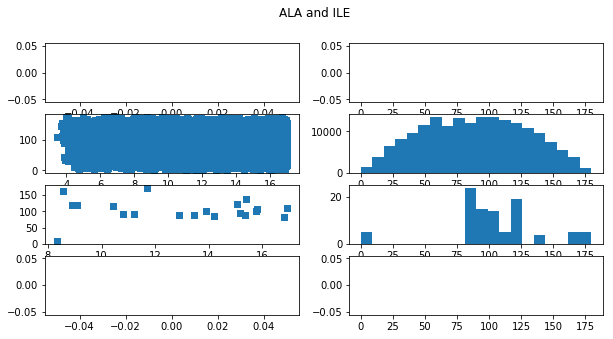

SSH connected
SSH connected
SSH connected
SSH connected


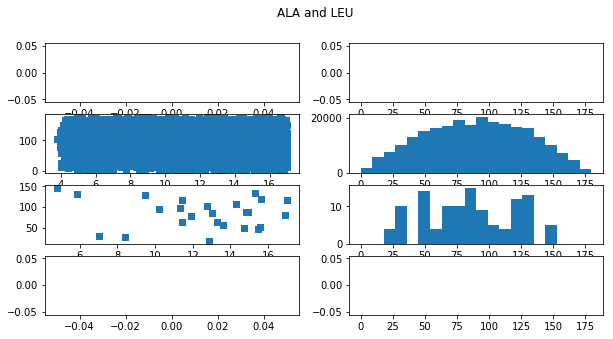

SSH connected
SSH connected
SSH connected
SSH connected


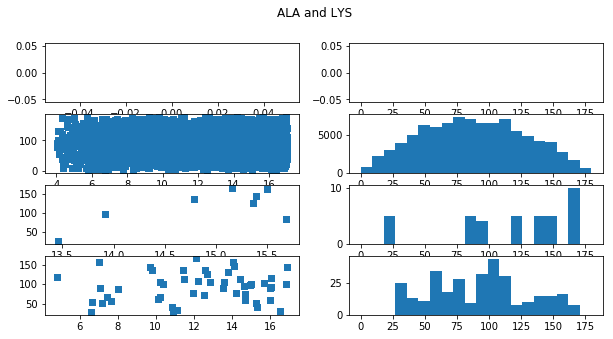

SSH connected
SSH connected
SSH connected
SSH connected


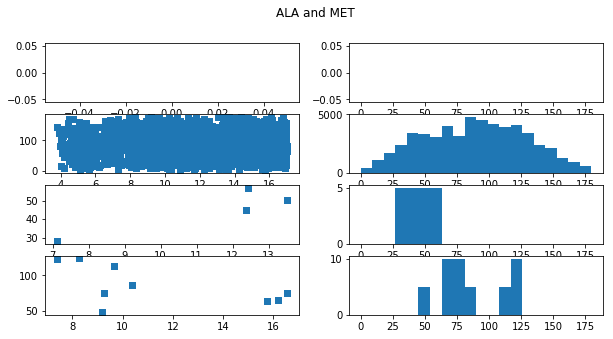

SSH connected
SSH connected
SSH connected
SSH connected


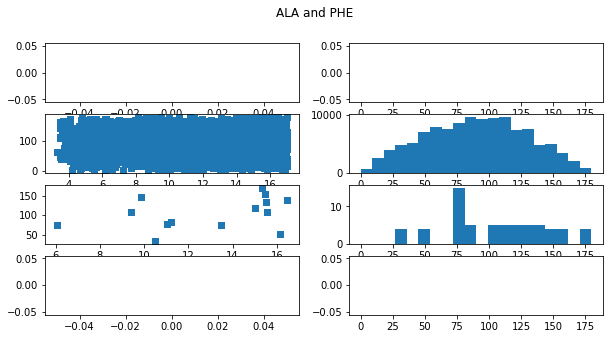

SSH connected
SSH connected
SSH connected
SSH connected


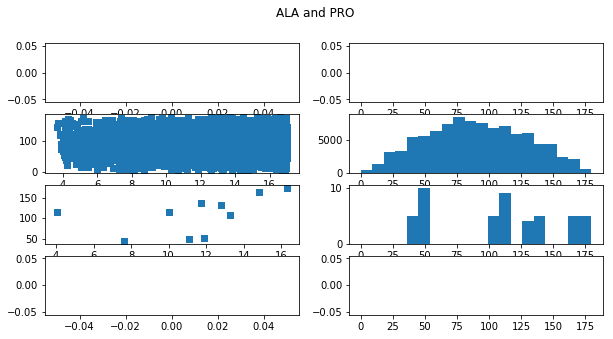

SSH connected
SSH connected
SSH connected
SSH connected


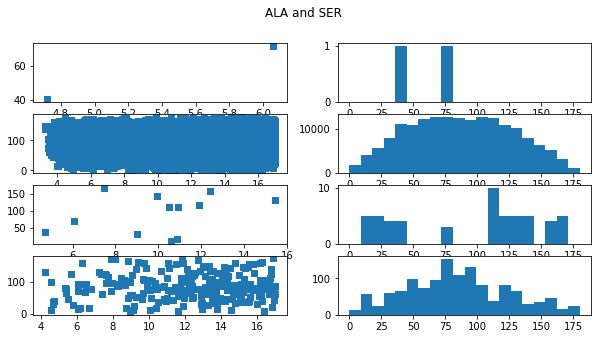

SSH connected
SSH connected
SSH connected
SSH connected


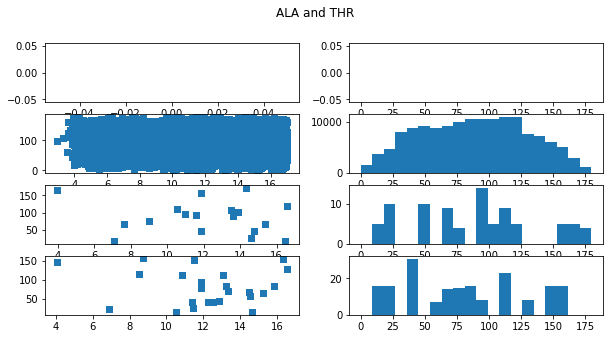

SSH connected
SSH connected
SSH connected
SSH connected


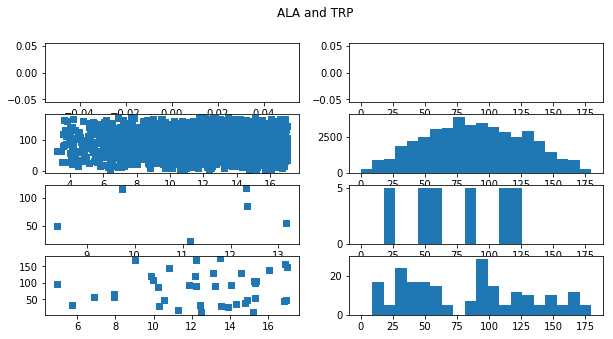

SSH connected
SSH connected
SSH connected
SSH connected


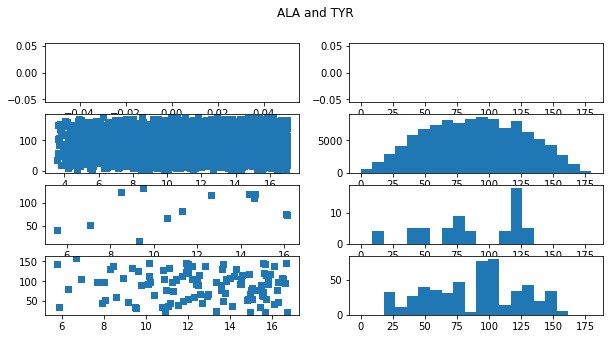

SSH connected
SSH connected
SSH connected
SSH connected


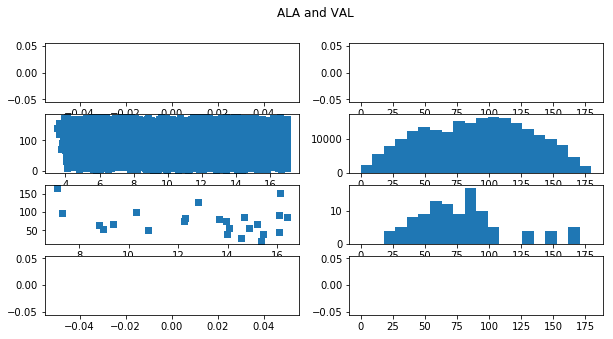

SSH connected
SSH connected
SSH connected
SSH connected


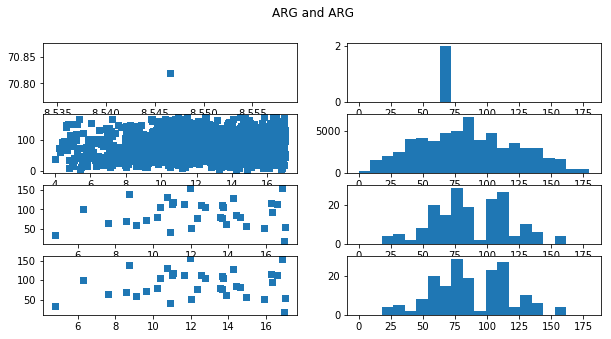

SSH connected
SSH connected
SSH connected
SSH connected


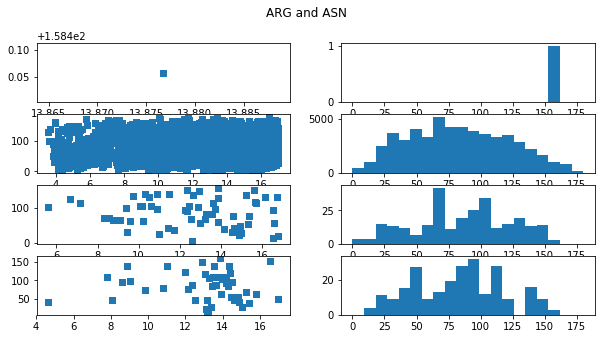

SSH connected
SSH connected
SSH connected
SSH connected


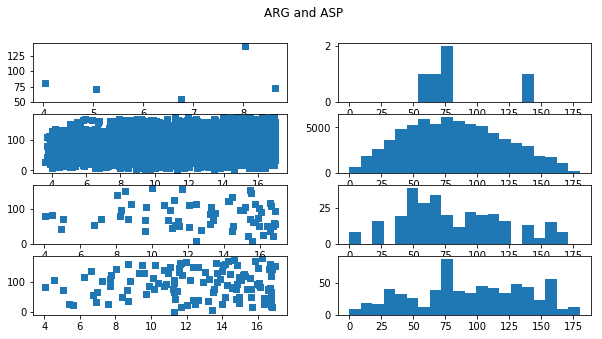

SSH connected
SSH connected
SSH connected
SSH connected


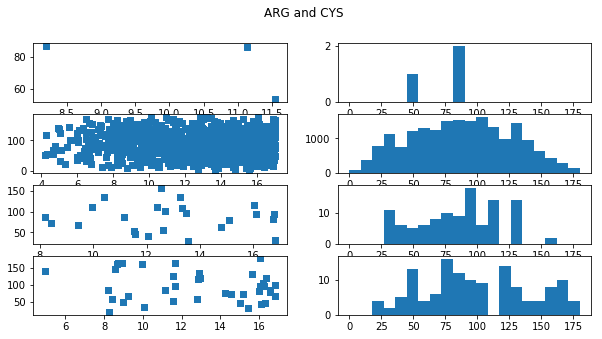

SSH connected
SSH connected
SSH connected
SSH connected


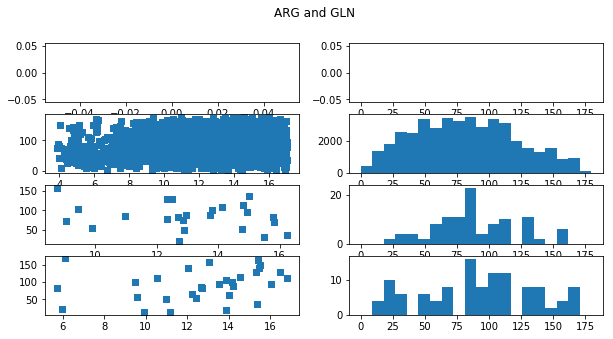

SSH connected
SSH connected
SSH connected
SSH connected


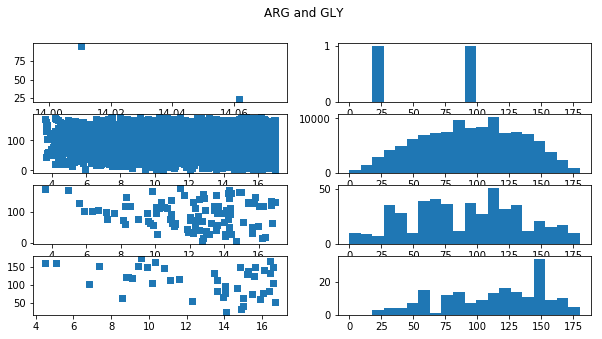

SSH connected
SSH connected
SSH connected
SSH connected


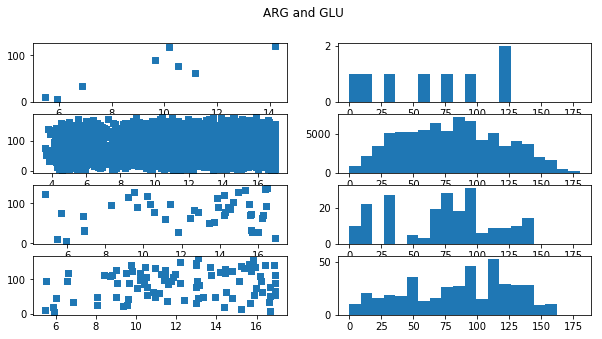

SSH connected
SSH connected
SSH connected
SSH connected


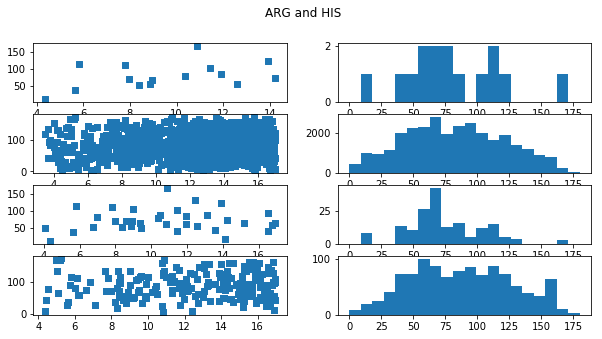

SSH connected
SSH connected
SSH connected
SSH connected


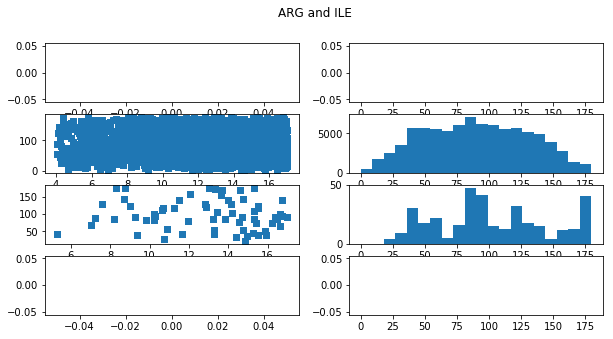

SSH connected
SSH connected
SSH connected
SSH connected


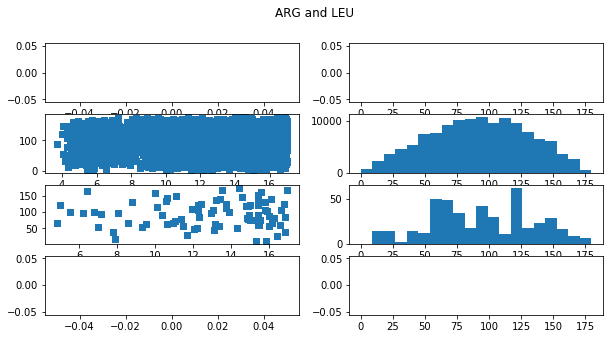

SSH connected
SSH connected
SSH connected
SSH connected


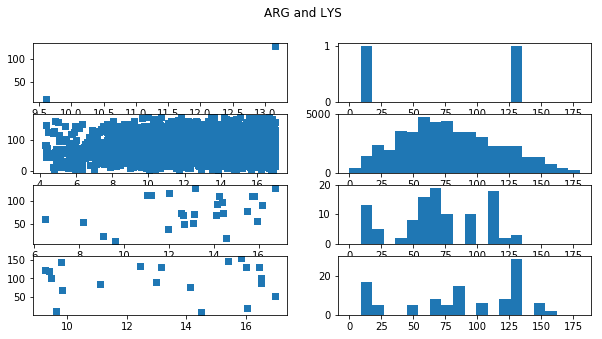

SSH connected
SSH connected
SSH connected
SSH connected


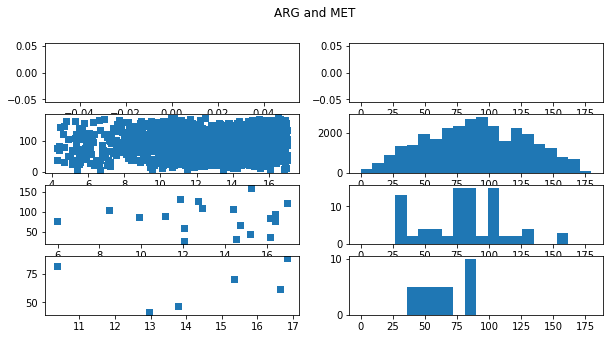

SSH connected
SSH connected
SSH connected
SSH connected


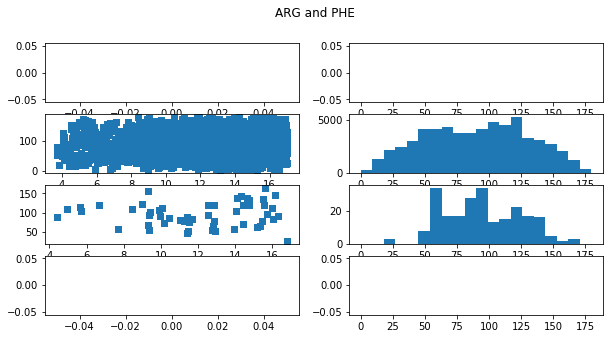

SSH connected
SSH connected
SSH connected
SSH connected


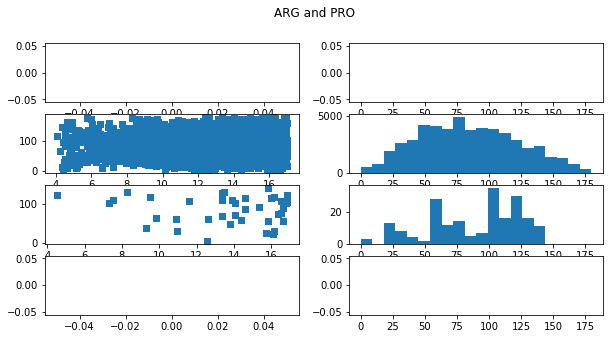

SSH connected
SSH connected
SSH connected
SSH connected


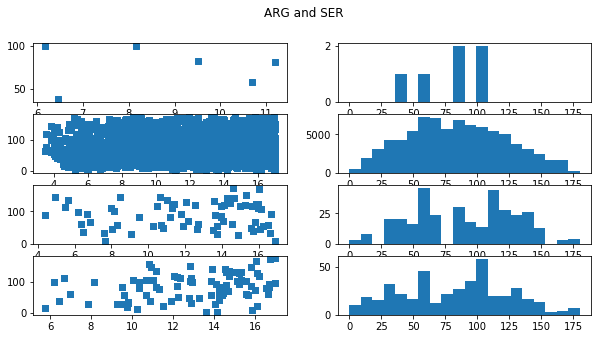

SSH connected
SSH connected
SSH connected
SSH connected


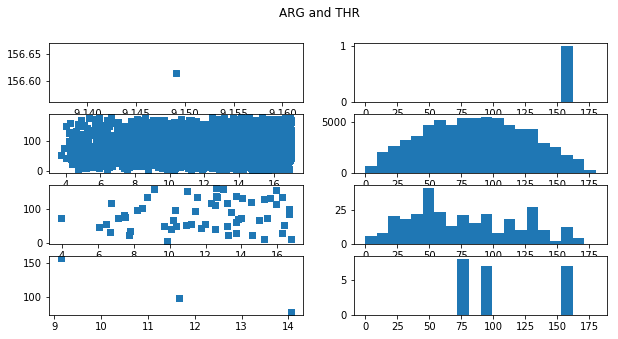

SSH connected
SSH connected
SSH connected
SSH connected


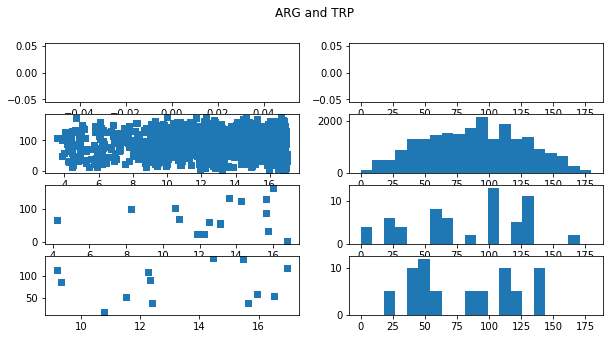

SSH connected
SSH connected
SSH connected
SSH connected


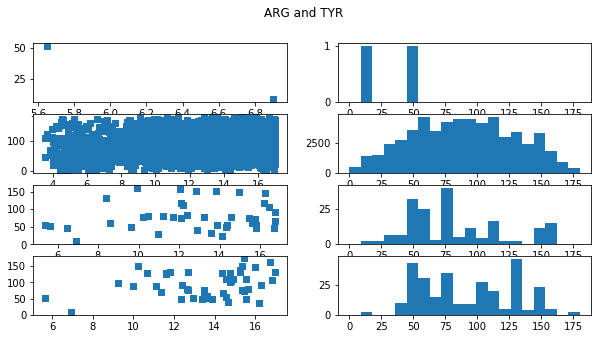

SSH connected
SSH connected
SSH connected
SSH connected


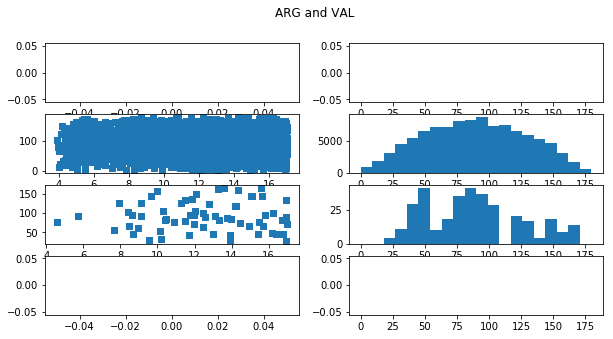

SSH connected
SSH connected
SSH connected
SSH connected


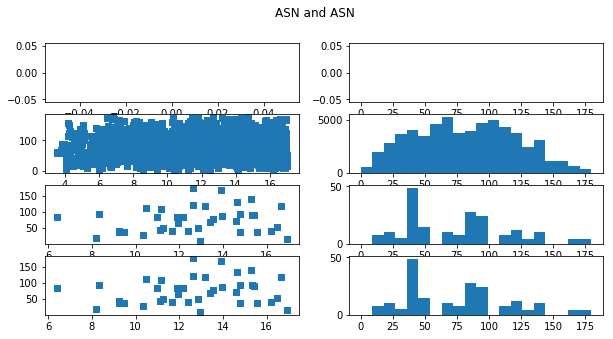

SSH connected
SSH connected
SSH connected
SSH connected


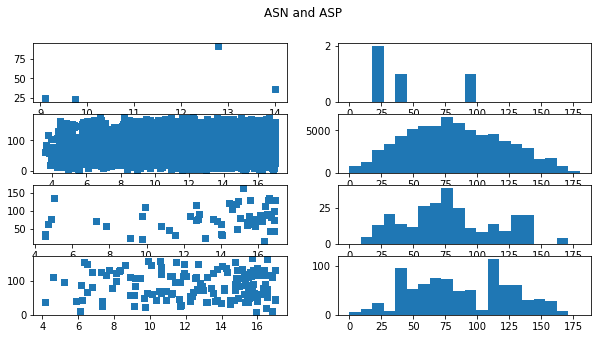

SSH connected
SSH connected
SSH connected
SSH connected


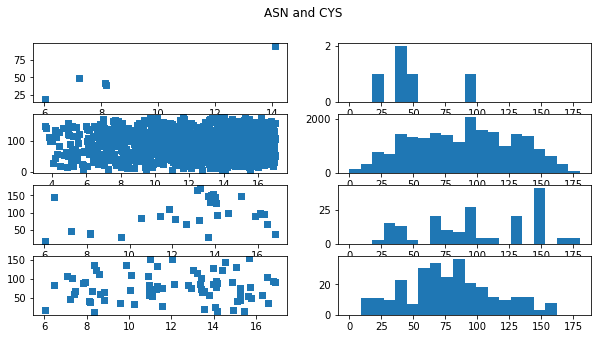

SSH connected
SSH connected
SSH connected
SSH connected


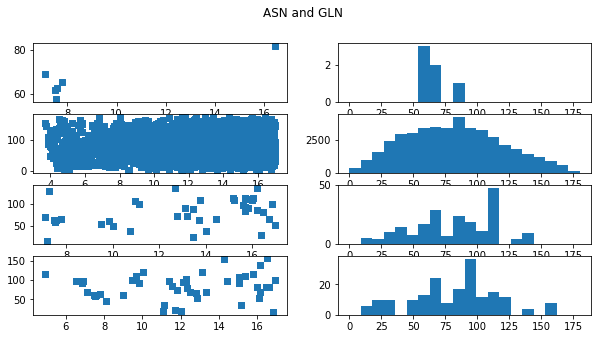

SSH connected
SSH connected
SSH connected
SSH connected


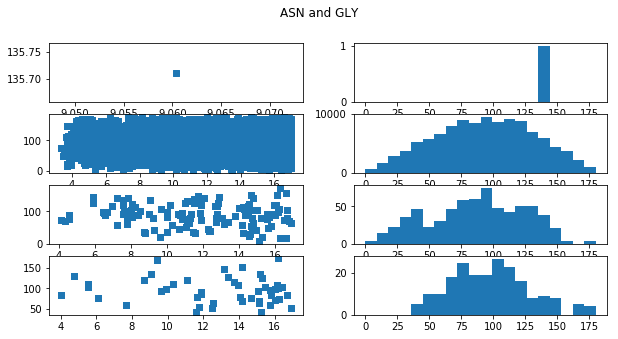

SSH connected
SSH connected
SSH connected
SSH connected


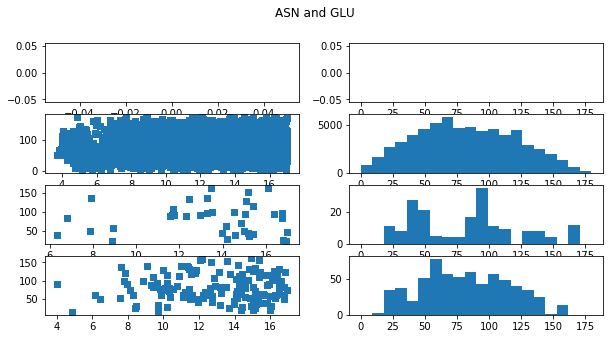

SSH connected
SSH connected
SSH connected
SSH connected


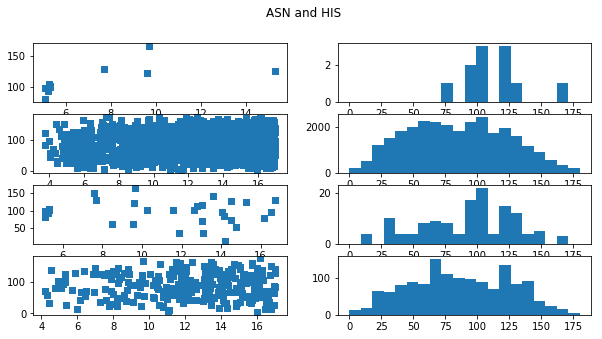

SSH connected
SSH connected
SSH connected
SSH connected


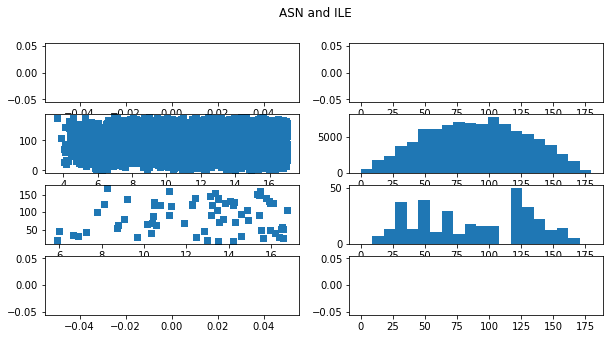

SSH connected
SSH connected
SSH connected
SSH connected


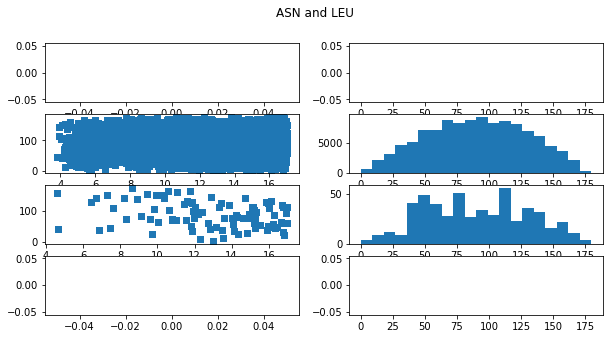

SSH connected
SSH connected
SSH connected
SSH connected


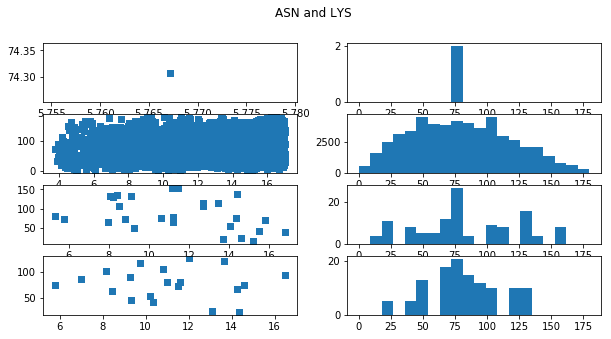

SSH connected
SSH connected
SSH connected
SSH connected


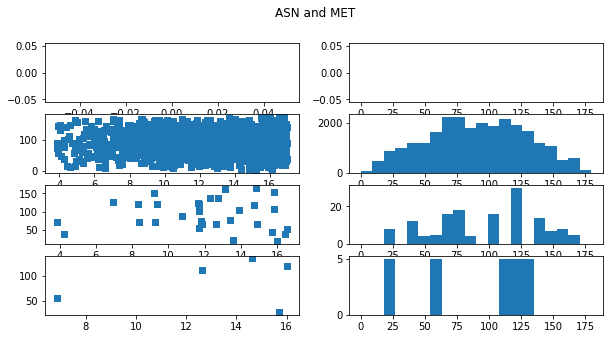

SSH connected
SSH connected
SSH connected
SSH connected


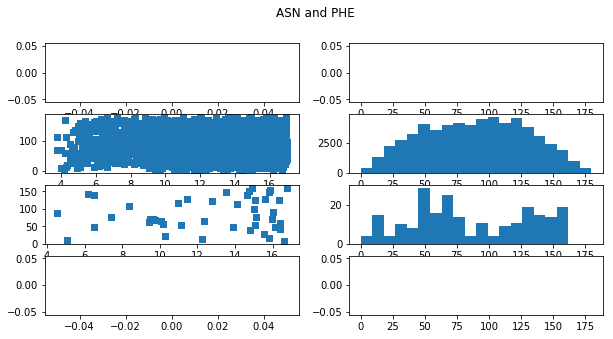

SSH connected
SSH connected
SSH connected
SSH connected


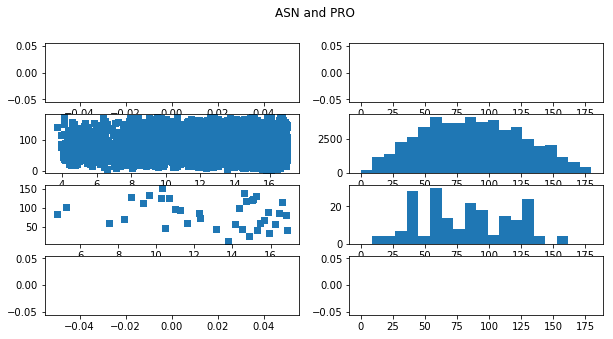

SSH connected
SSH connected
SSH connected
SSH connected


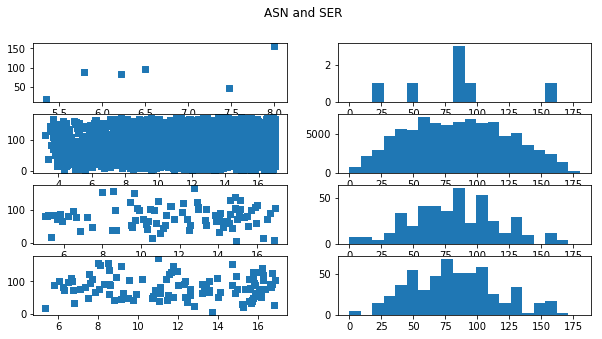

SSH connected
SSH connected
SSH connected
SSH connected


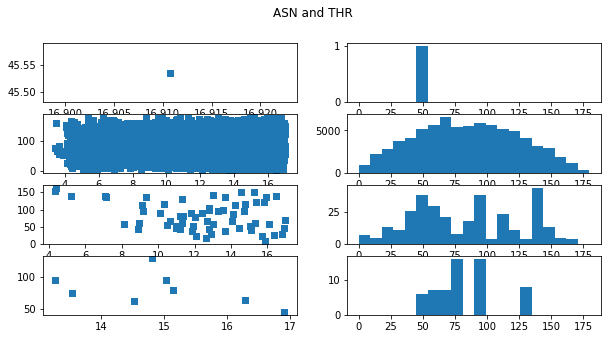

SSH connected
SSH connected
SSH connected
SSH connected


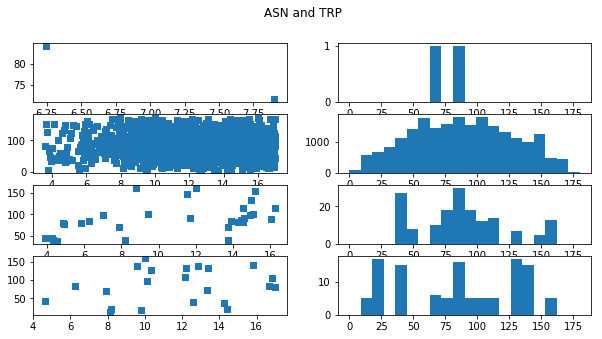

SSH connected
SSH connected
SSH connected
SSH connected


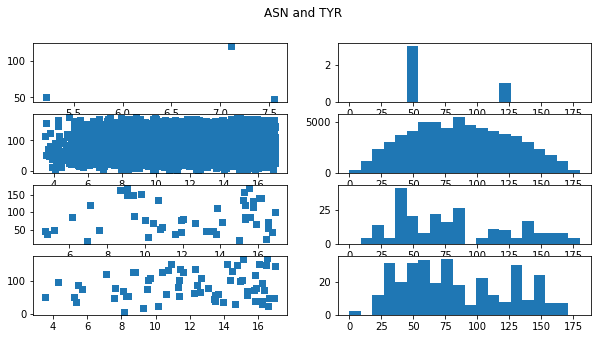

SSH connected
SSH connected
SSH connected
SSH connected


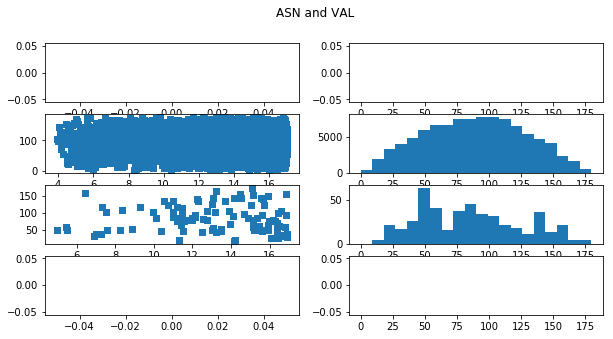

SSH connected
SSH connected
SSH connected
SSH connected


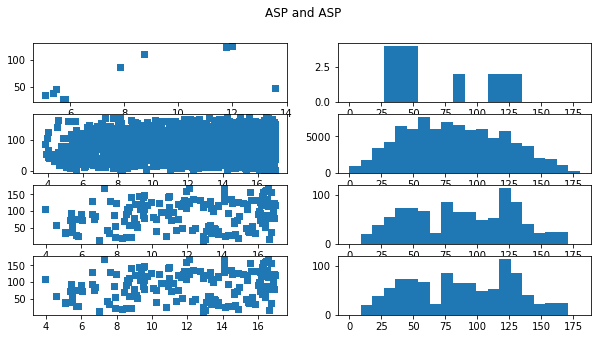

SSH connected
SSH connected
SSH connected
SSH connected


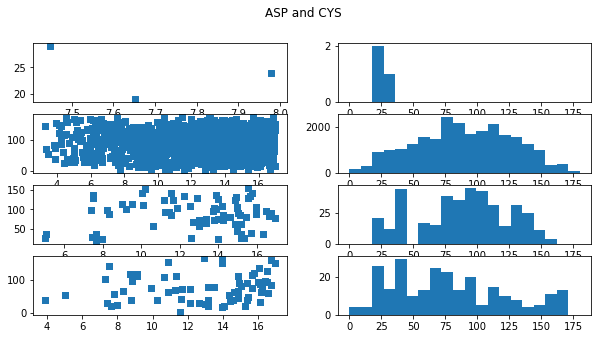

SSH connected
SSH connected
SSH connected
SSH connected


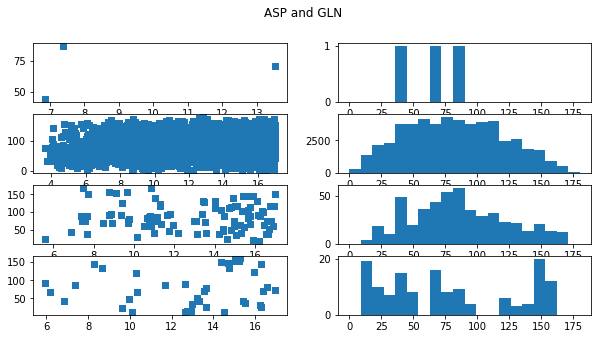

SSH connected
SSH connected
SSH connected
SSH connected


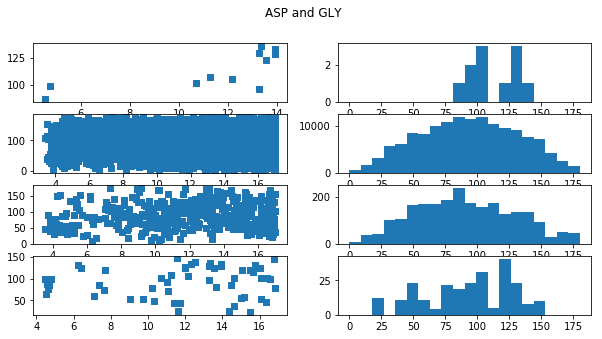

SSH connected
SSH connected
SSH connected
SSH connected


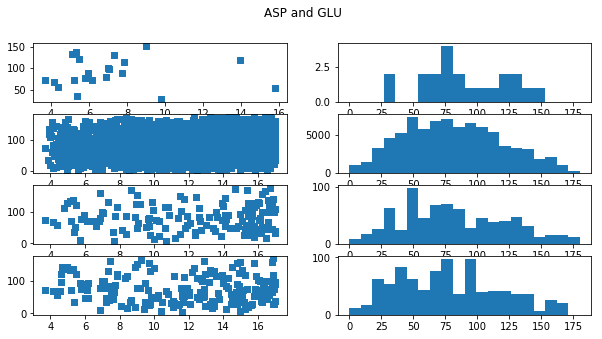

SSH connected
SSH connected
SSH connected
SSH connected


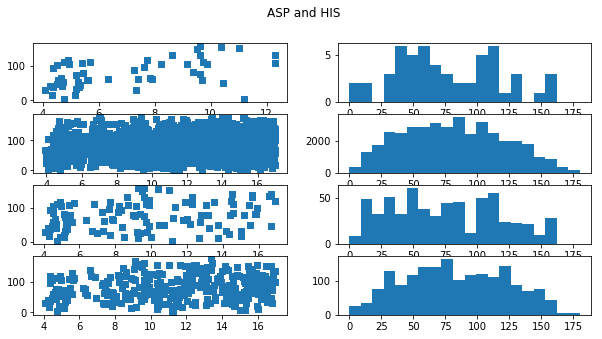

SSH connected
SSH connected
SSH connected
SSH connected


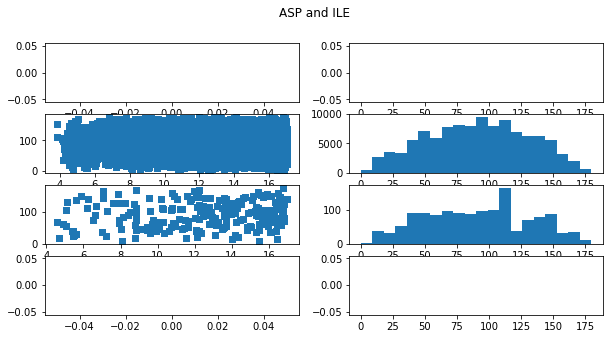

SSH connected
SSH connected
SSH connected
SSH connected


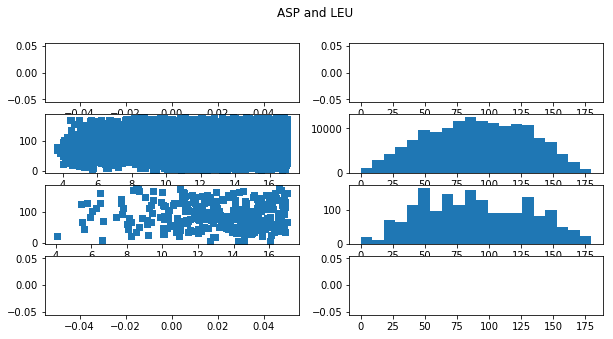

SSH connected
SSH connected
SSH connected
SSH connected


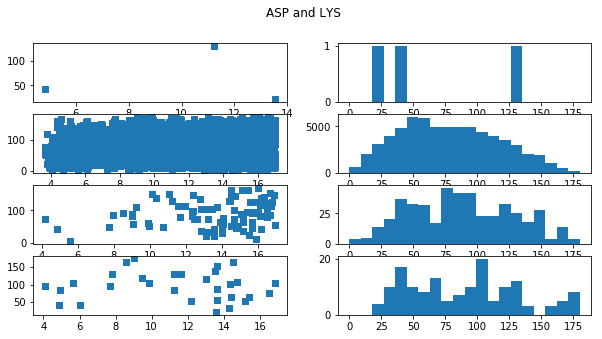

SSH connected
SSH connected
SSH connected
SSH connected


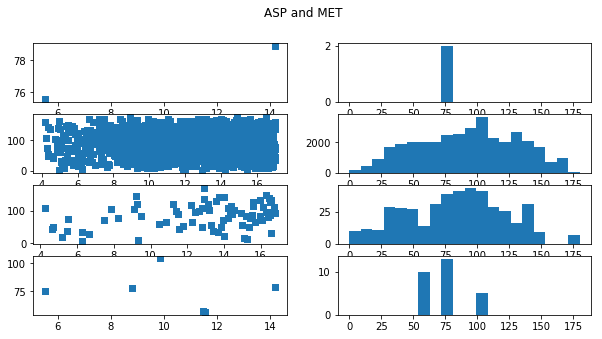

SSH connected
SSH connected
SSH connected
SSH connected


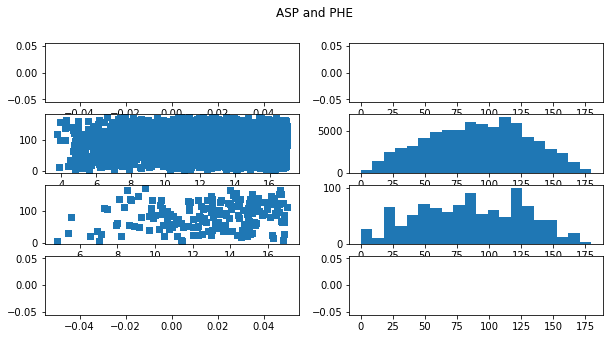

SSH connected
SSH connected
SSH connected
SSH connected


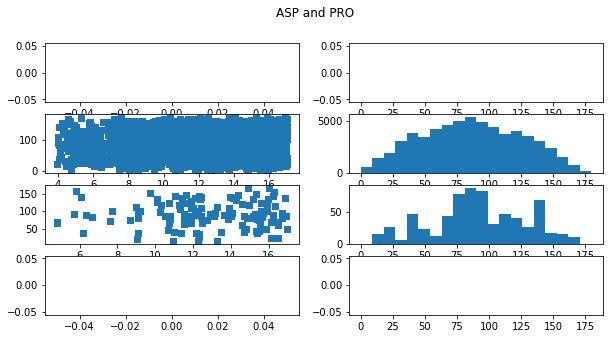

SSH connected
SSH connected
SSH connected
SSH connected


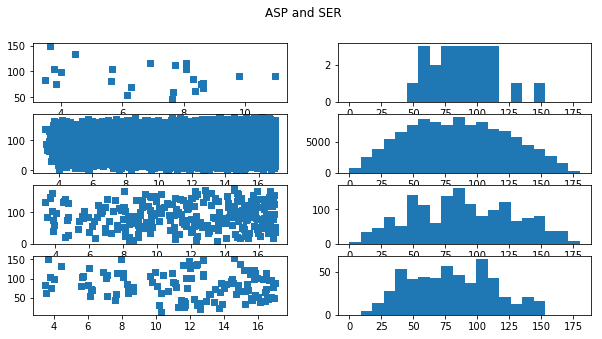

SSH connected
SSH connected
SSH connected
SSH connected


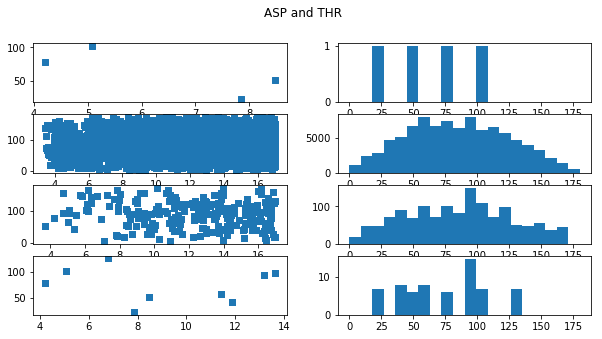

SSH connected
SSH connected
SSH connected
SSH connected


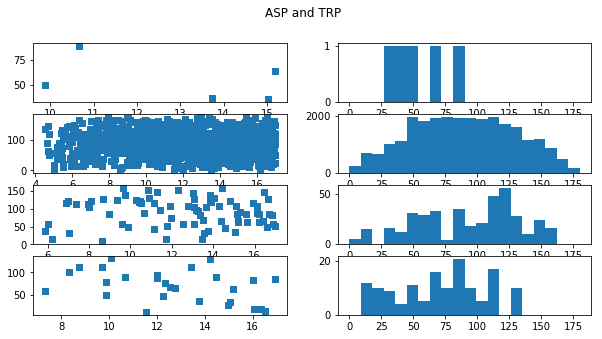

SSH connected
SSH connected
SSH connected
SSH connected


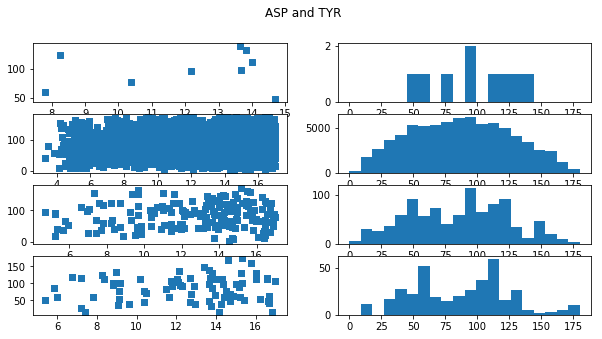

SSH connected
SSH connected
SSH connected
SSH connected


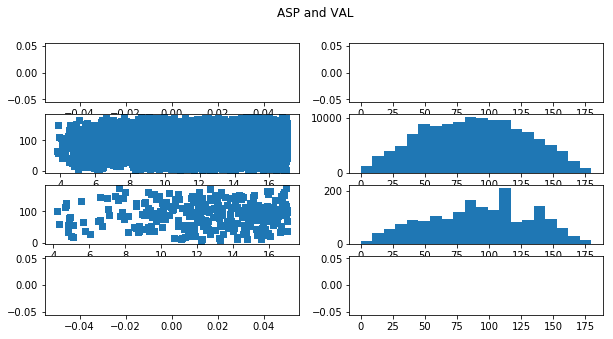

SSH connected
SSH connected
SSH connected
SSH connected


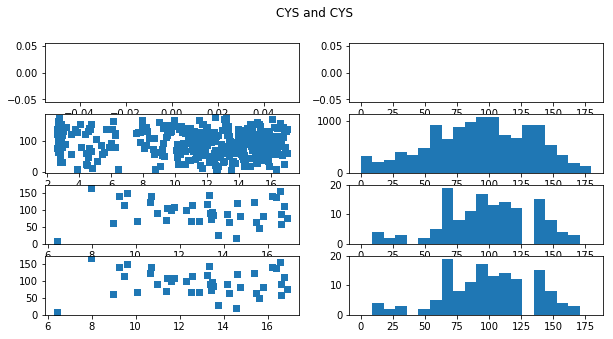

SSH connected
SSH connected
SSH connected
SSH connected


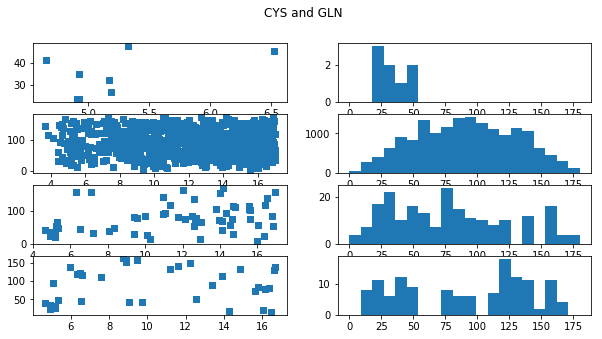

SSH connected
SSH connected
SSH connected
SSH connected


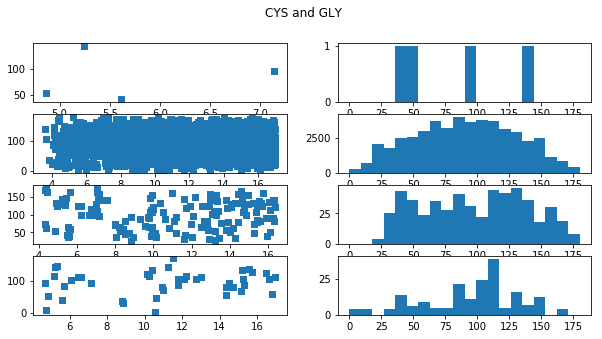

SSH connected
SSH connected
SSH connected
SSH connected


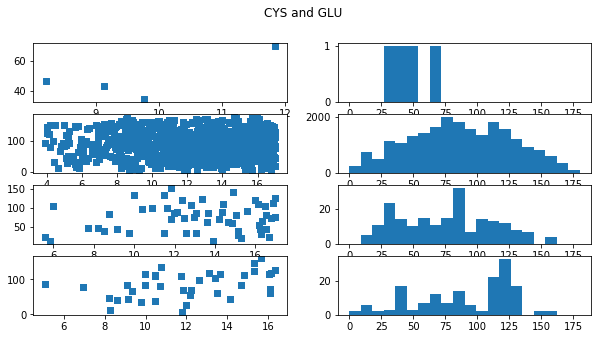

SSH connected
SSH connected
SSH connected
SSH connected


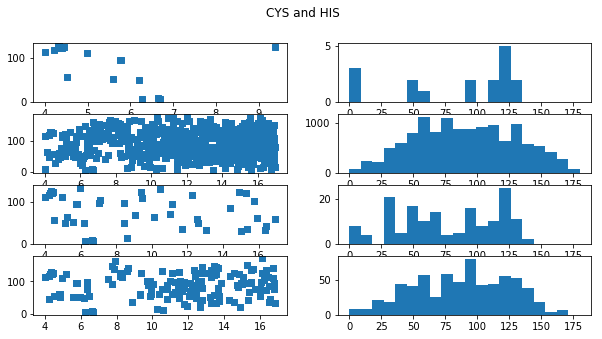

SSH connected
SSH connected
SSH connected
SSH connected


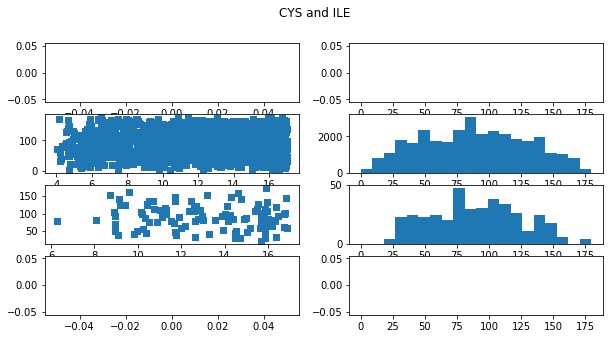

SSH connected
SSH connected
SSH connected
SSH connected


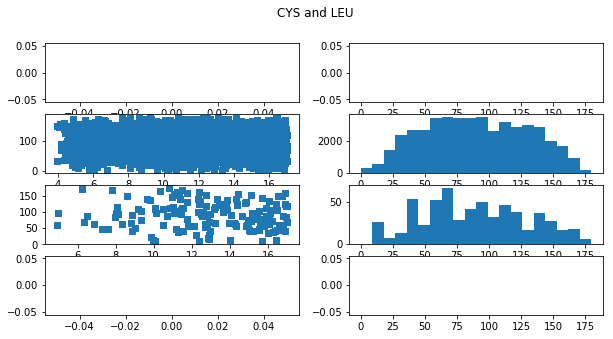

SSH connected
SSH connected
SSH connected
SSH connected


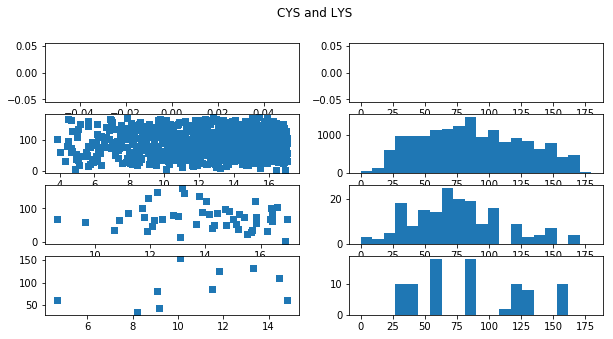

SSH connected
SSH connected
SSH connected
SSH connected


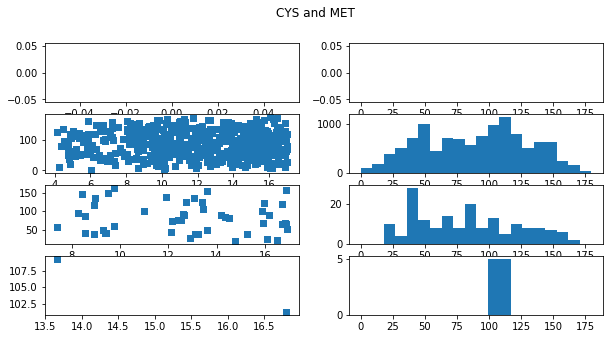

SSH connected
SSH connected
SSH connected
SSH connected


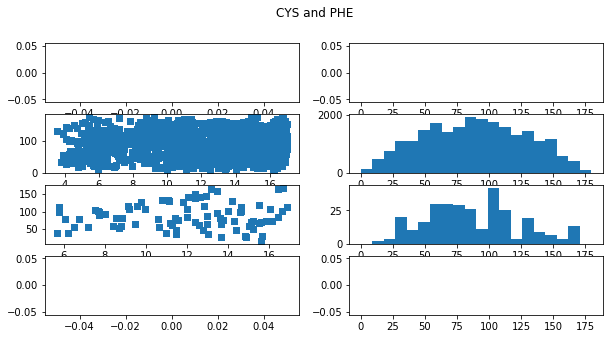

SSH connected
SSH connected
SSH connected
SSH connected


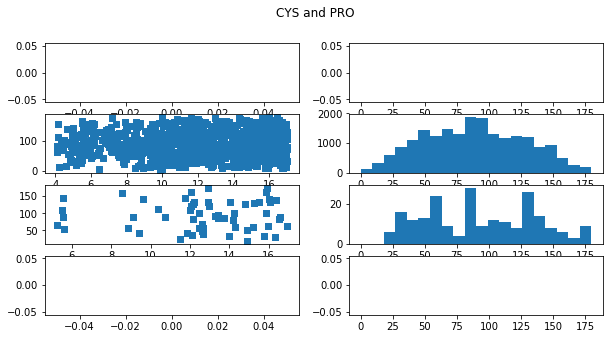

SSH connected
SSH connected
SSH connected
SSH connected


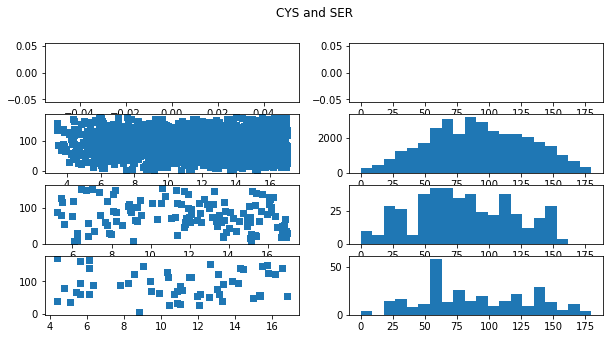

SSH connected
SSH connected
SSH connected
SSH connected


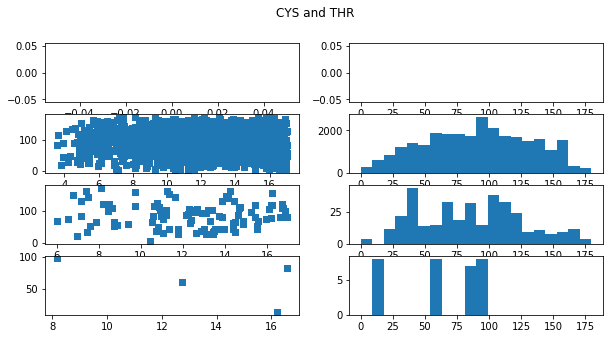

SSH connected
SSH connected
SSH connected
SSH connected


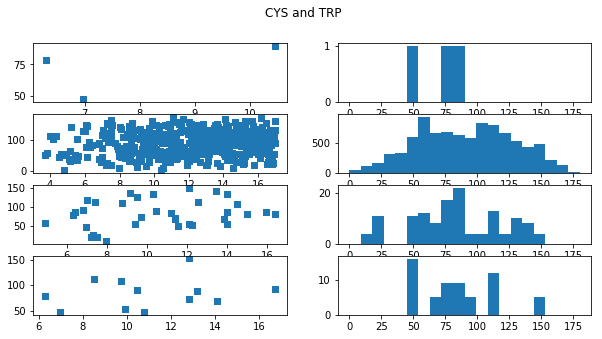

SSH connected
SSH connected
SSH connected
SSH connected


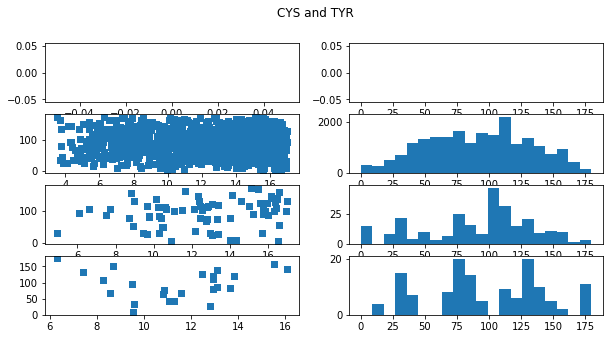

SSH connected
SSH connected
SSH connected
SSH connected


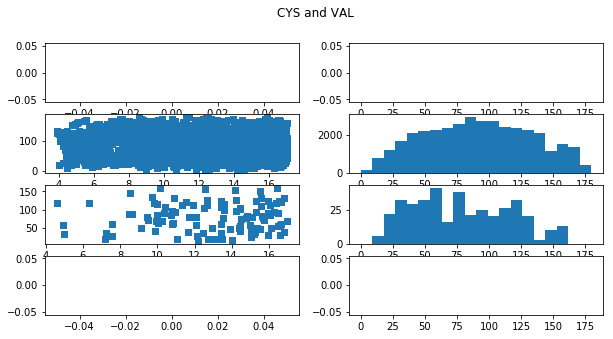

SSH connected
SSH connected
SSH connected
SSH connected


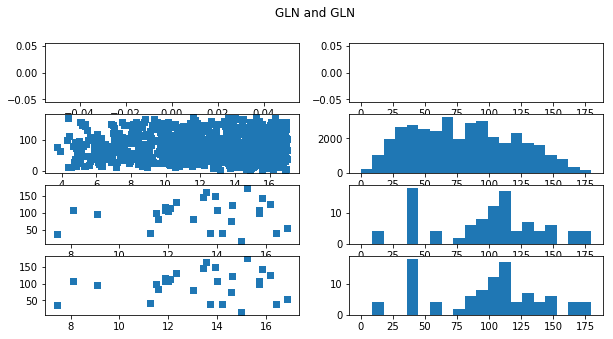

SSH connected
SSH connected
SSH connected
SSH connected


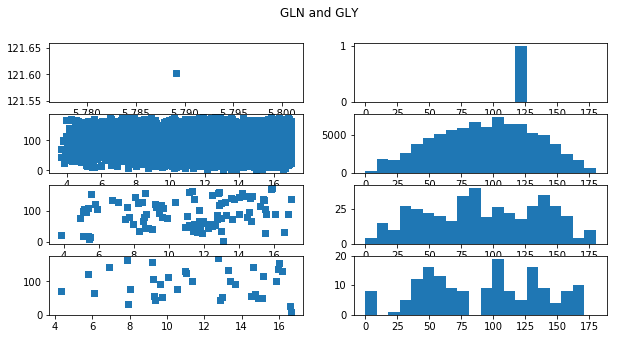

SSH connected
SSH connected
SSH connected
SSH connected


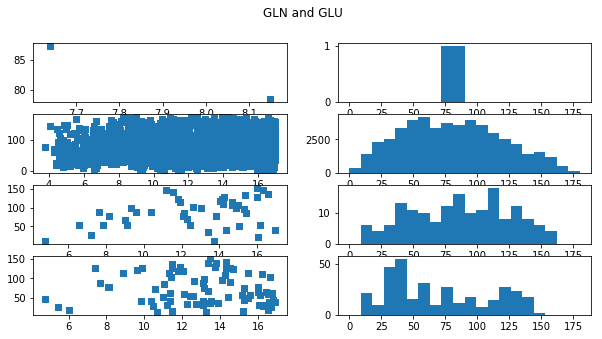

SSH connected
SSH connected
SSH connected
SSH connected


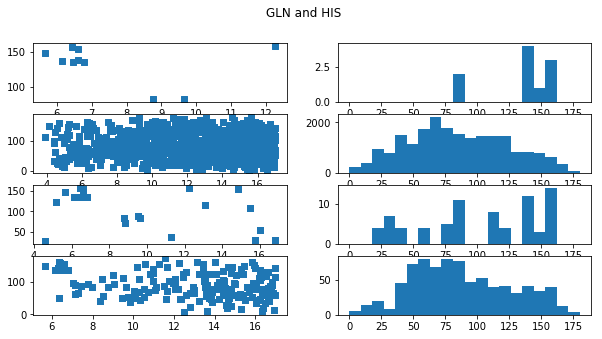

SSH connected
SSH connected
SSH connected
SSH connected


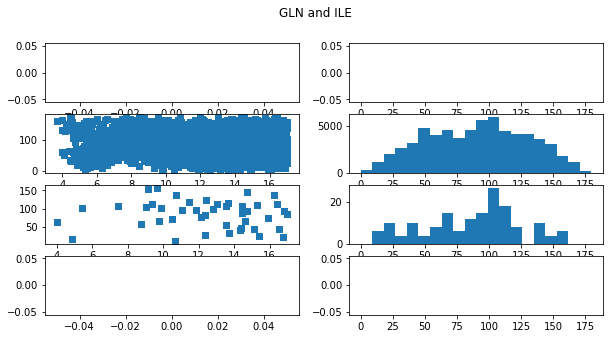

SSH connected
SSH connected
SSH connected
SSH connected


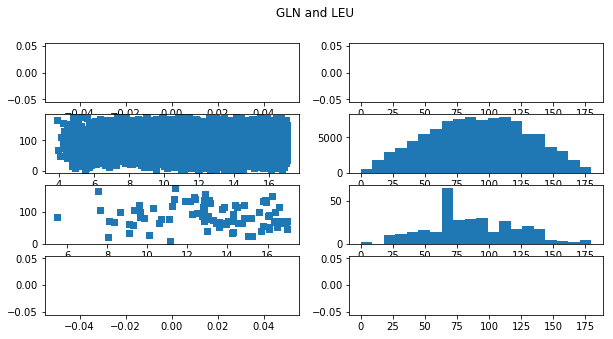

SSH connected
SSH connected
SSH connected
SSH connected


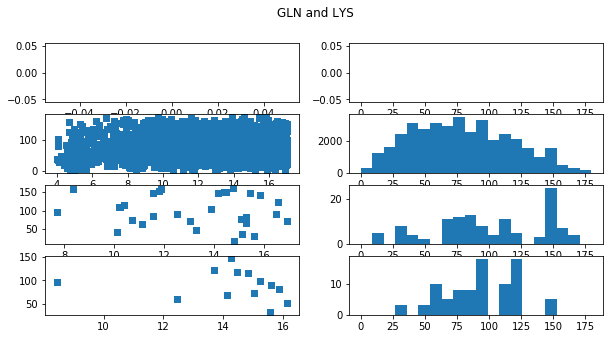

SSH connected
SSH connected
SSH connected
SSH connected


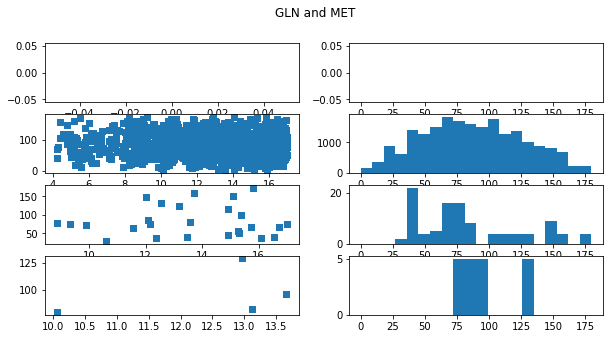

SSH connected
SSH connected
SSH connected
SSH connected


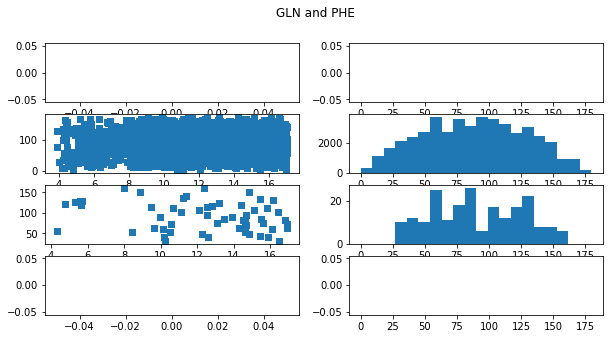

SSH connected
SSH connected
SSH connected
SSH connected


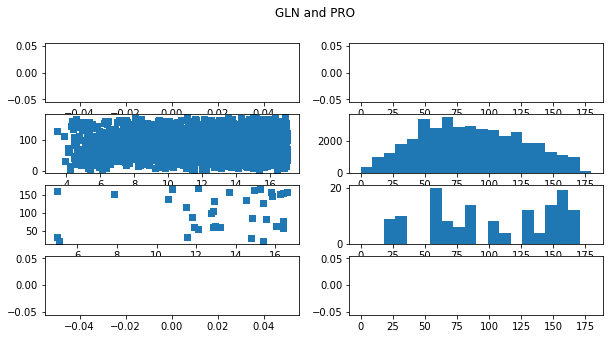

SSH connected
SSH connected
SSH connected
SSH connected


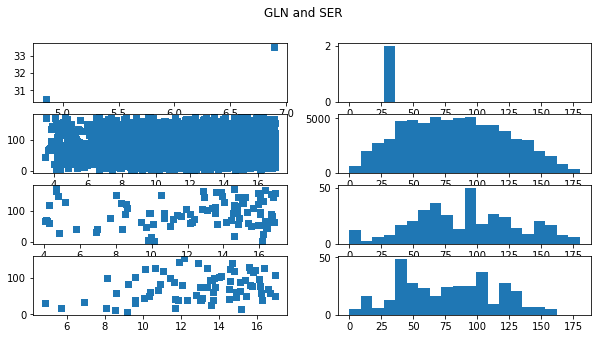

SSH connected
SSH connected
SSH connected
SSH connected


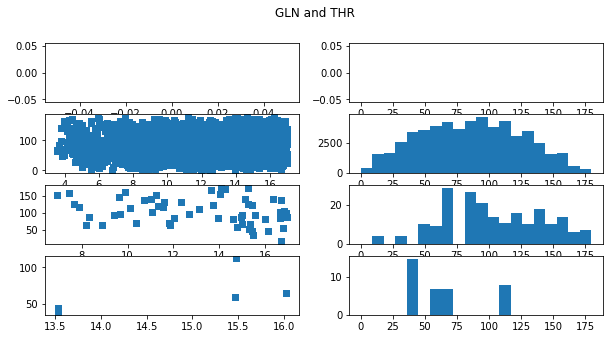

SSH connected
SSH connected
SSH connected
SSH connected


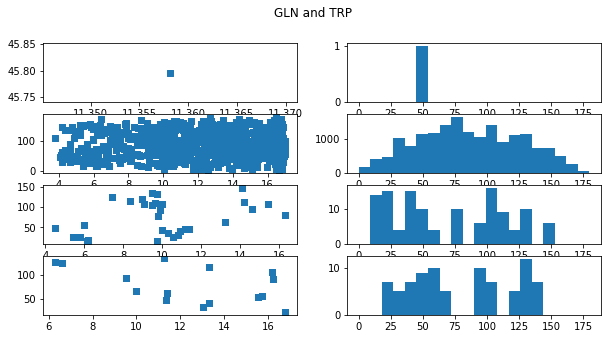

SSH connected
SSH connected
SSH connected
SSH connected


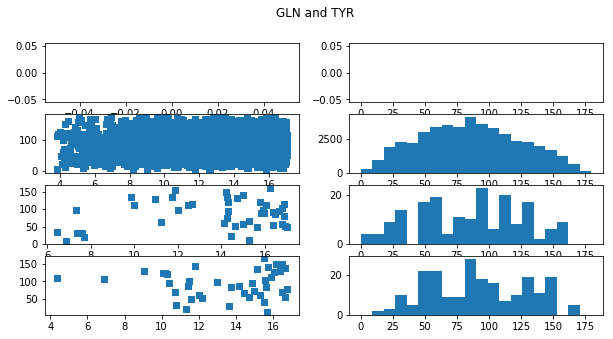

SSH connected
SSH connected
SSH connected
SSH connected


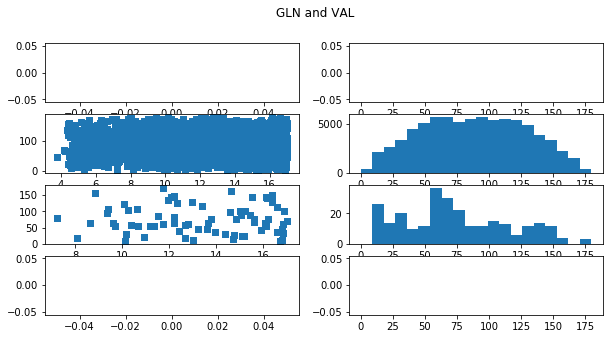

SSH connected
SSH connected
SSH connected
SSH connected


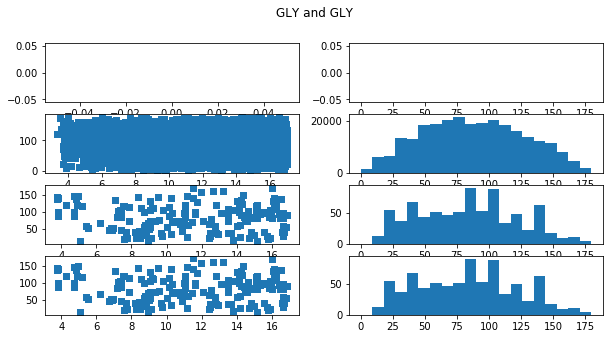

SSH connected
SSH connected
SSH connected
SSH connected


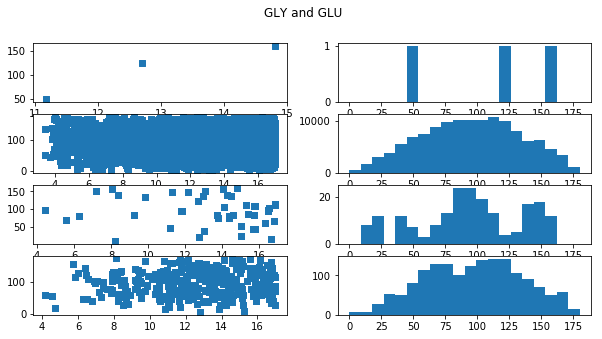

SSH connected
SSH connected
SSH connected
SSH connected


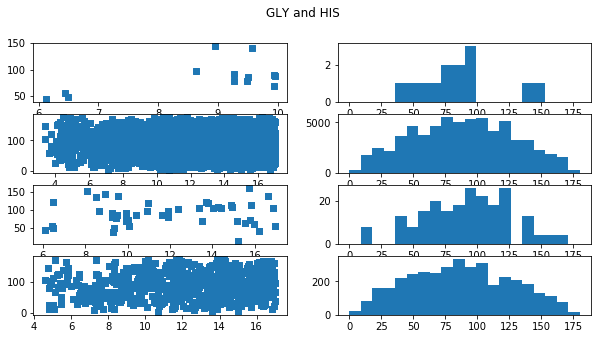

SSH connected
SSH connected
SSH connected
SSH connected


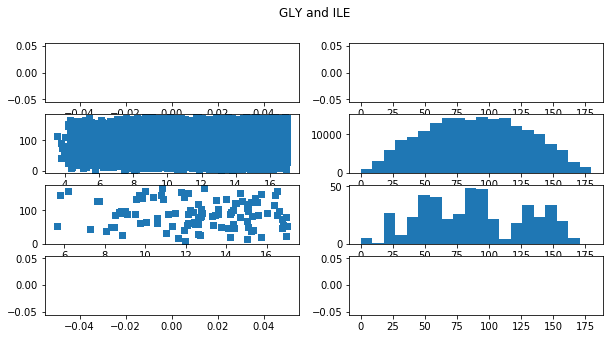

SSH connected
SSH connected
SSH connected
SSH connected


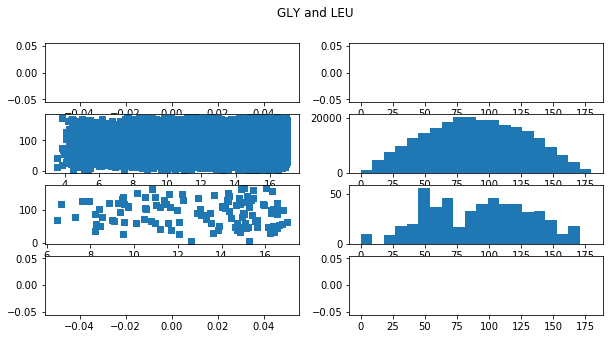

SSH connected
SSH connected
SSH connected
SSH connected


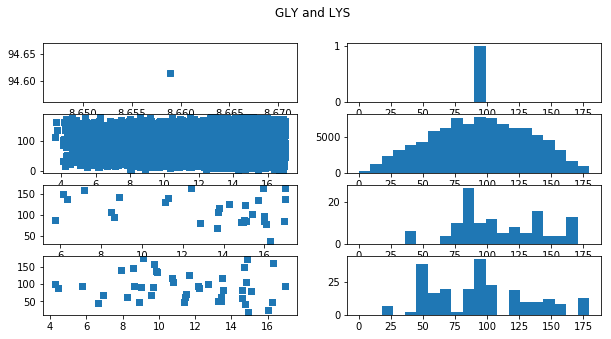

SSH connected
SSH connected
SSH connected
SSH connected


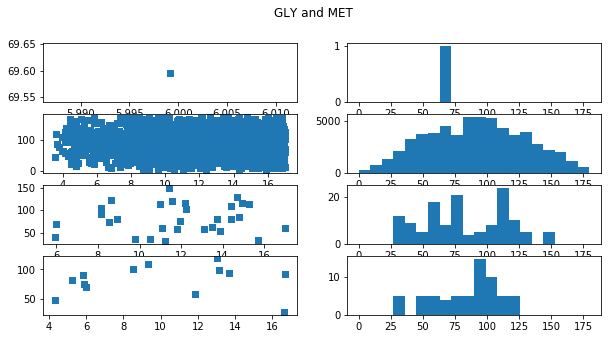

SSH connected
SSH connected
SSH connected
SSH connected


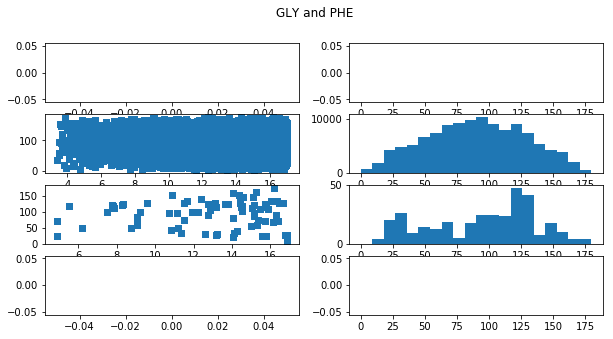

SSH connected
SSH connected
SSH connected
SSH connected


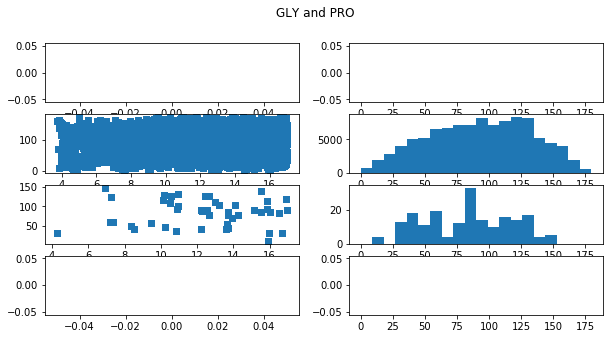

SSH connected
SSH connected
SSH connected
SSH connected


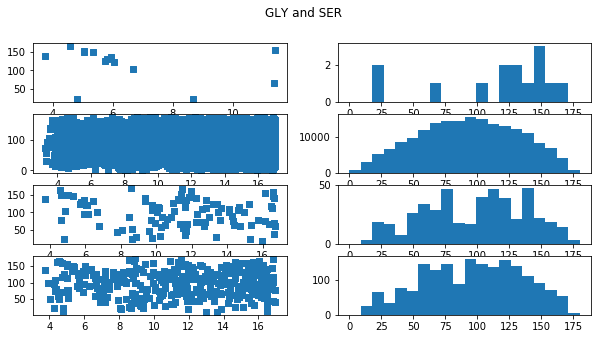

SSH connected
SSH connected
SSH connected
SSH connected


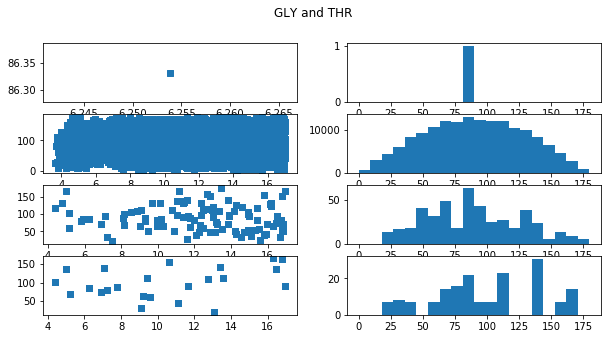

SSH connected
SSH connected
SSH connected
SSH connected


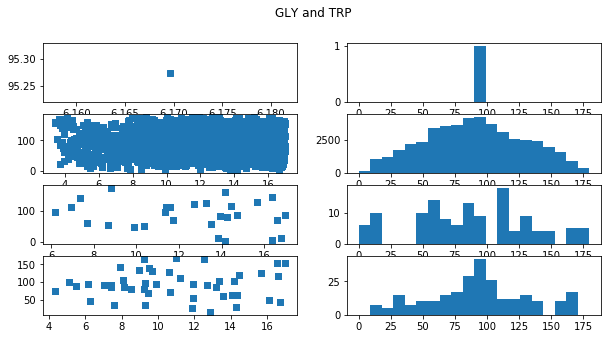

SSH connected
SSH connected
SSH connected
SSH connected


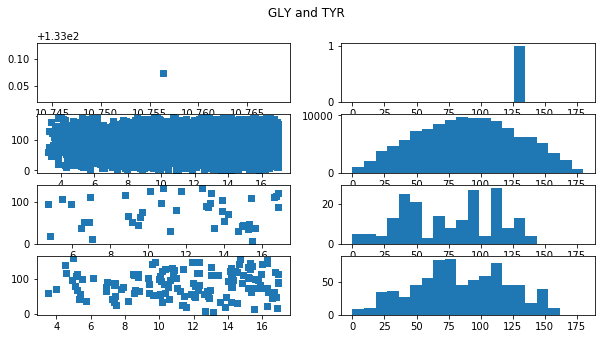

SSH connected
SSH connected
SSH connected
SSH connected


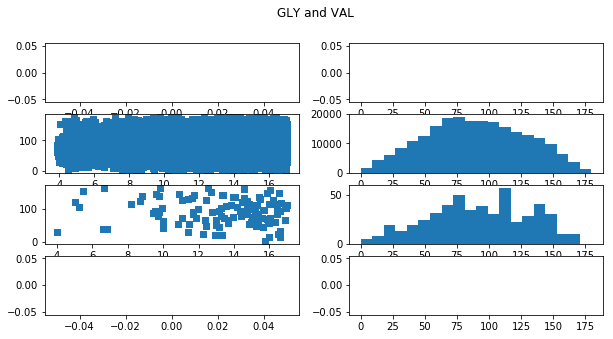

SSH connected
SSH connected
SSH connected
SSH connected


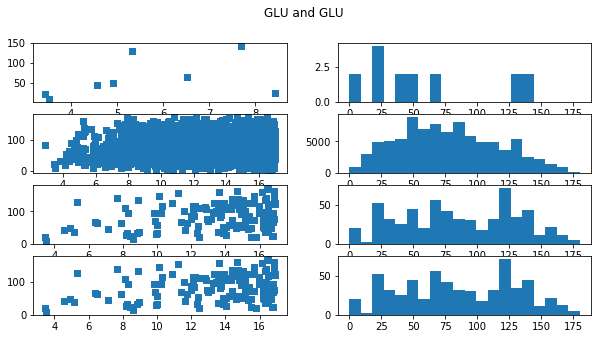

SSH connected
SSH connected
SSH connected
SSH connected


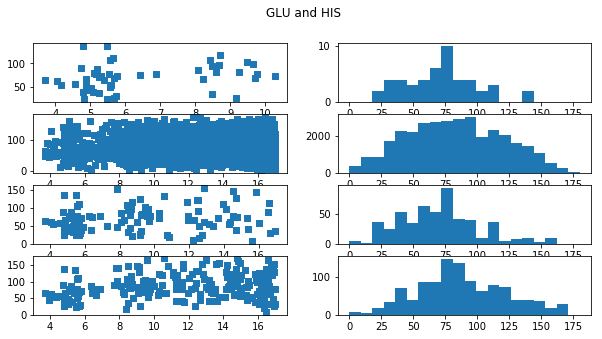

SSH connected
SSH connected
SSH connected
SSH connected


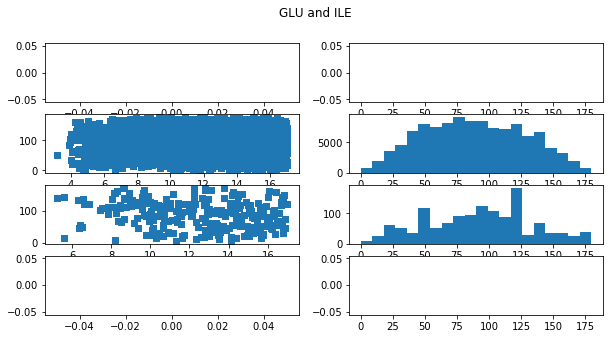

SSH connected
SSH connected
SSH connected
SSH connected


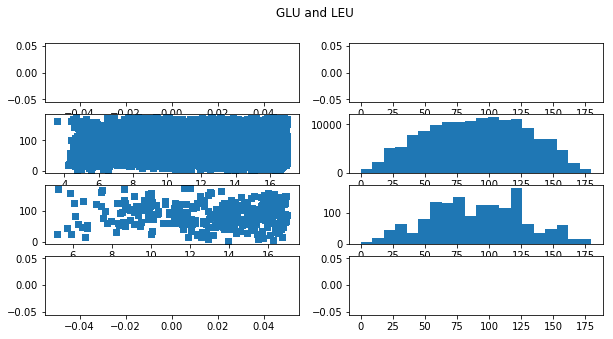

SSH connected
SSH connected
SSH connected
SSH connected


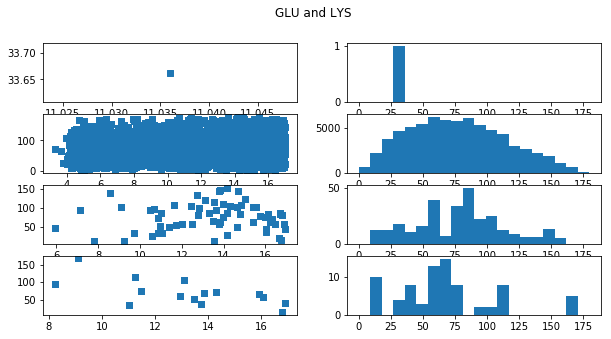

SSH connected
SSH connected
SSH connected
SSH connected


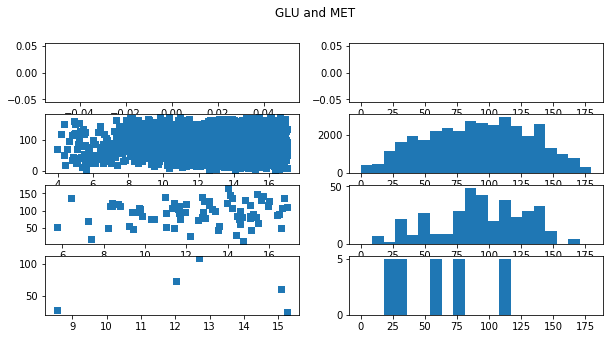

SSH connected
SSH connected
SSH connected
SSH connected


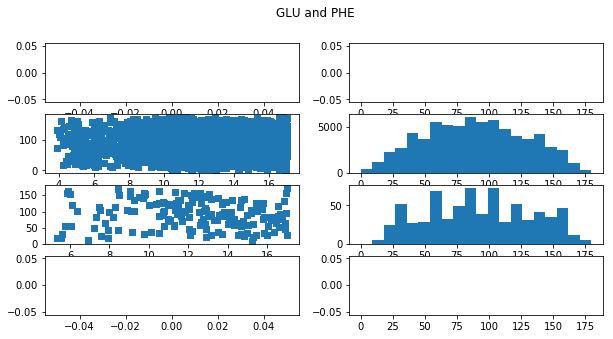

SSH connected
SSH connected
SSH connected
SSH connected


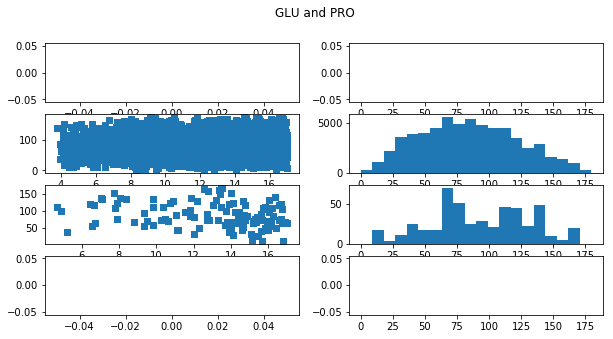

SSH connected
SSH connected
SSH connected
SSH connected


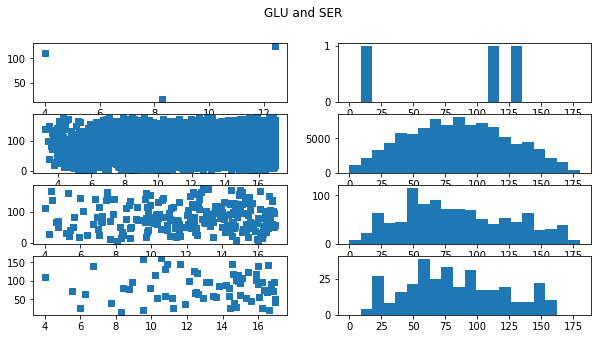

SSH connected
SSH connected
SSH connected
SSH connected


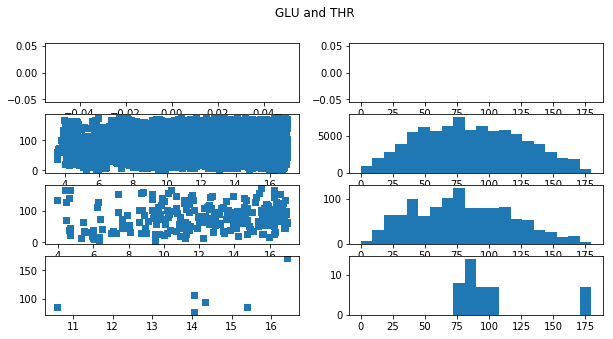

SSH connected
SSH connected
SSH connected
SSH connected


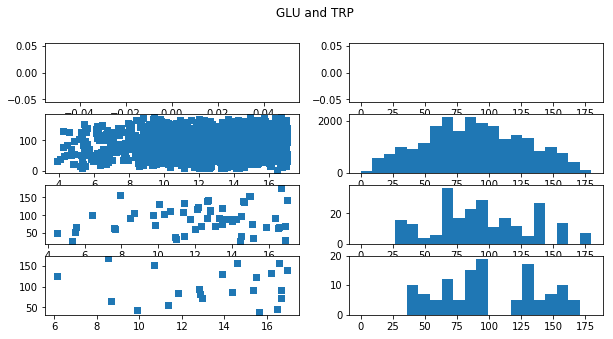

SSH connected
SSH connected
SSH connected
SSH connected


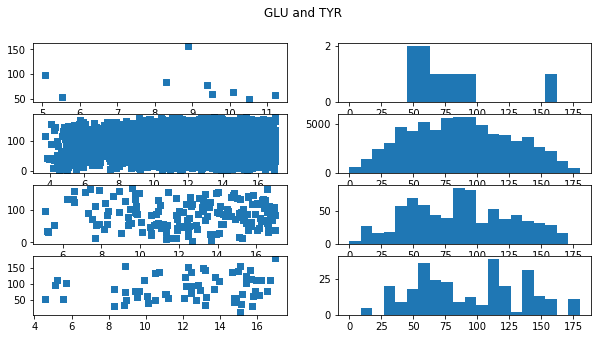

SSH connected
SSH connected
SSH connected
SSH connected


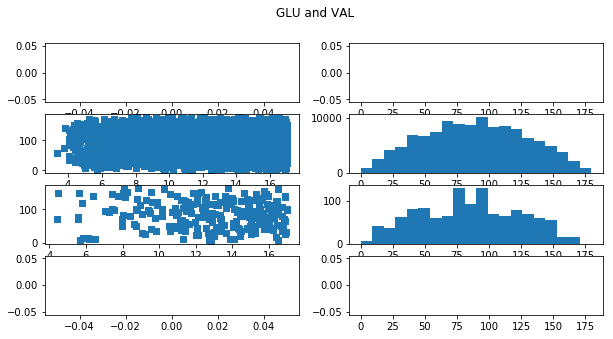

SSH connected
SSH connected
SSH connected
SSH connected


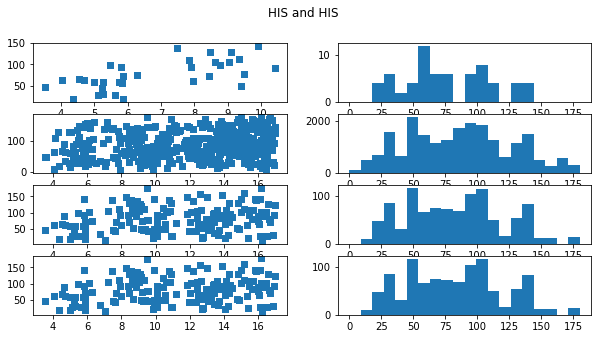

SSH connected
SSH connected
SSH connected
SSH connected


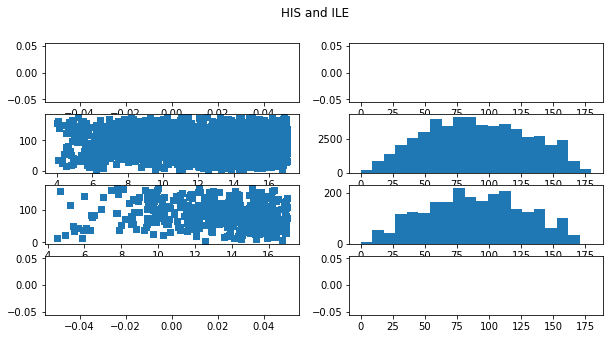

SSH connected
SSH connected
SSH connected
SSH connected


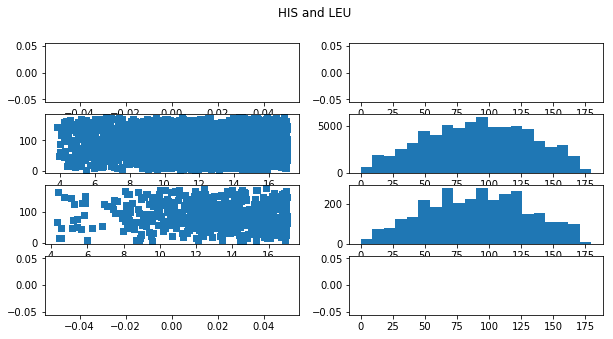

SSH connected
SSH connected
SSH connected
SSH connected


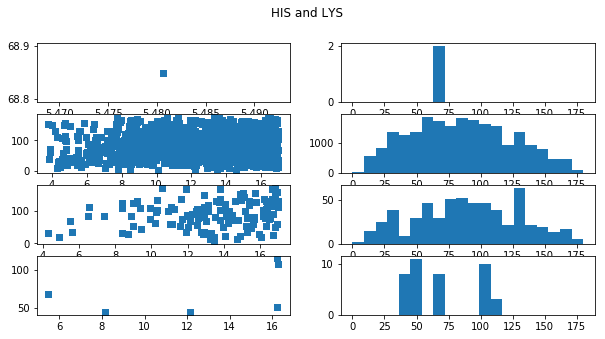

SSH connected
SSH connected
SSH connected
SSH connected


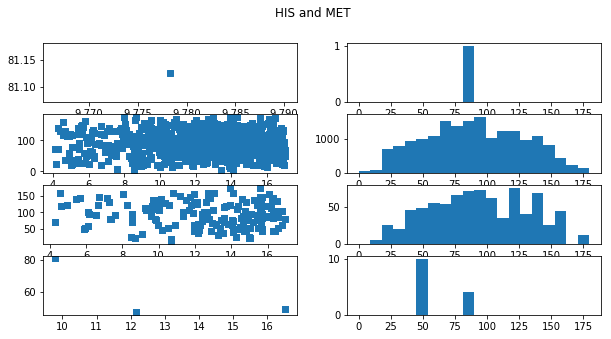

SSH connected
SSH connected
SSH connected
SSH connected


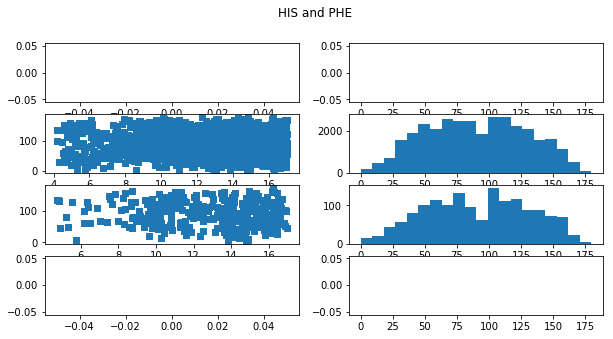

SSH connected
SSH connected
SSH connected
SSH connected


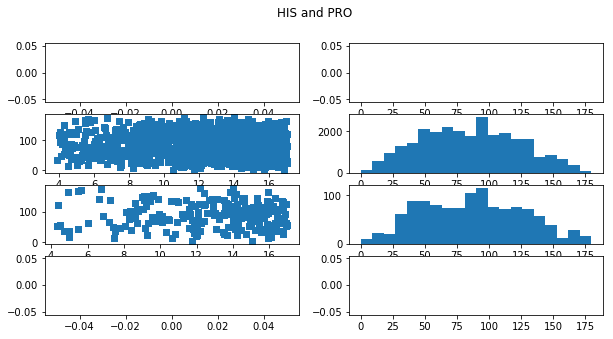

SSH connected
SSH connected
SSH connected
SSH connected


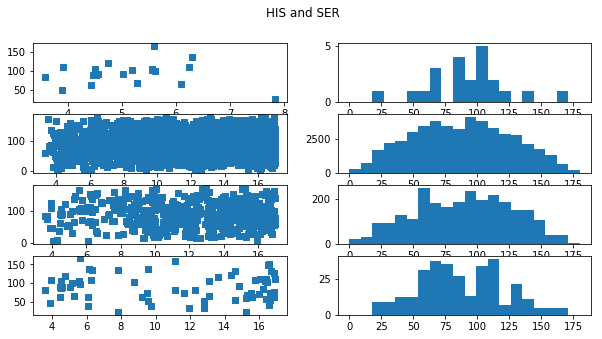

SSH connected
SSH connected
SSH connected
SSH connected


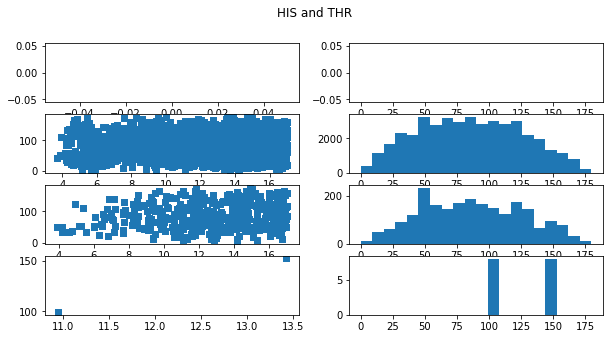

SSH connected
SSH connected
SSH connected
SSH connected


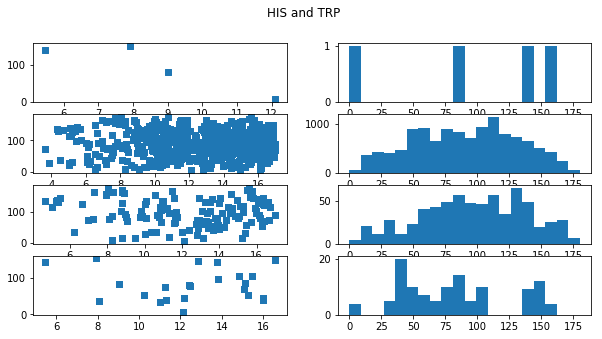

SSH connected
SSH connected
SSH connected
SSH connected


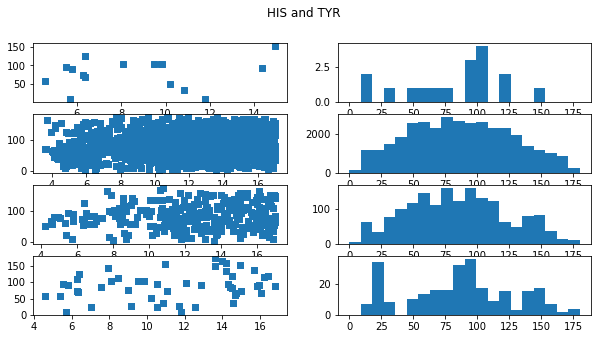

SSH connected
SSH connected
SSH connected
SSH connected


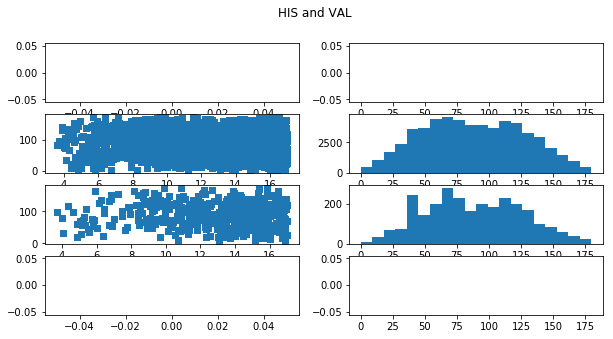

SSH connected
SSH connected
SSH connected
SSH connected


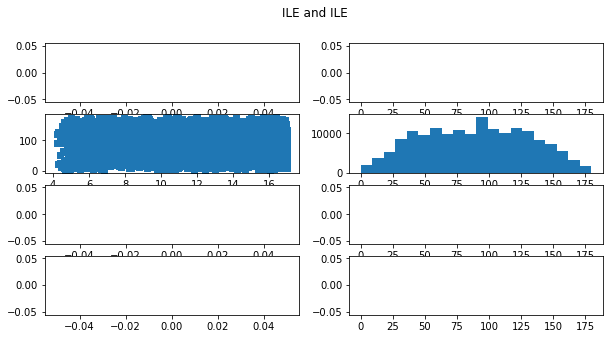

SSH connected
SSH connected
SSH connected
SSH connected


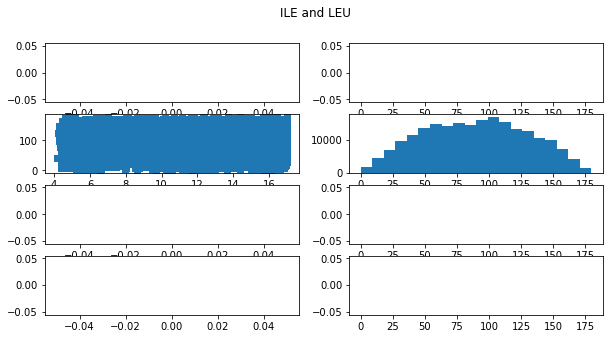

SSH connected
SSH connected
SSH connected
SSH connected


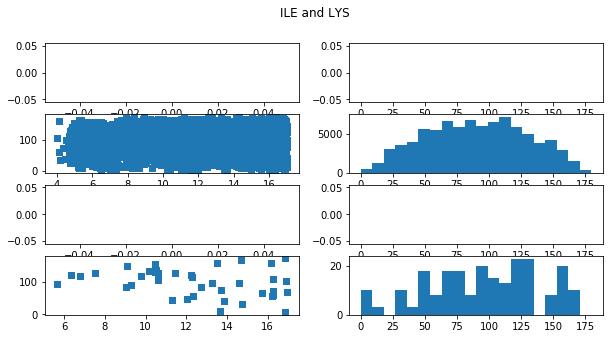

SSH connected
SSH connected
SSH connected
SSH connected


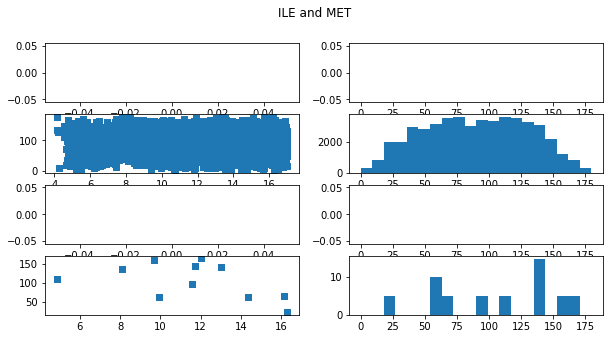

SSH connected
SSH connected
SSH connected
SSH connected


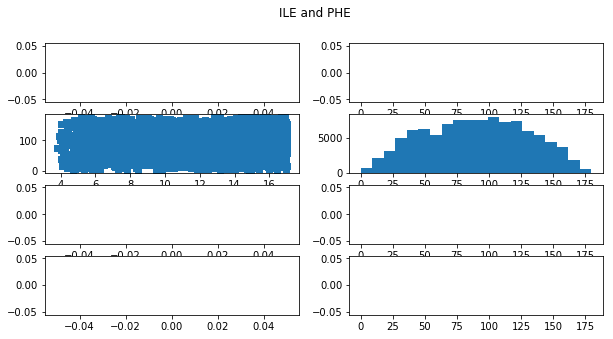

SSH connected
SSH connected
SSH connected
SSH connected


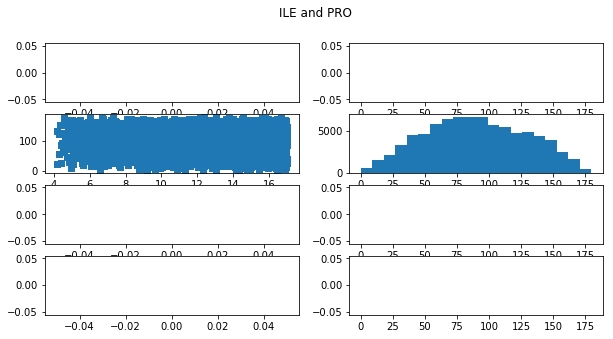

SSH connected
SSH connected
SSH connected
SSH connected


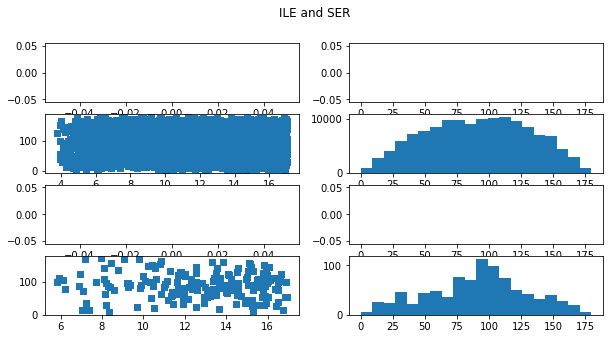

SSH connected
SSH connected
SSH connected
SSH connected


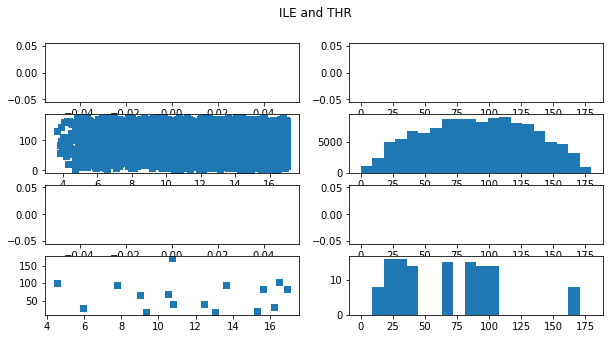

SSH connected
SSH connected
SSH connected
SSH connected


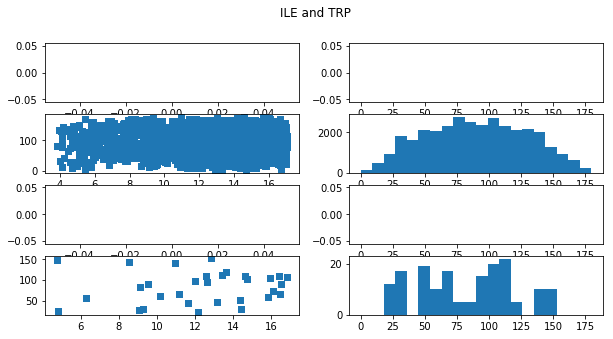

SSH connected
SSH connected
SSH connected
SSH connected


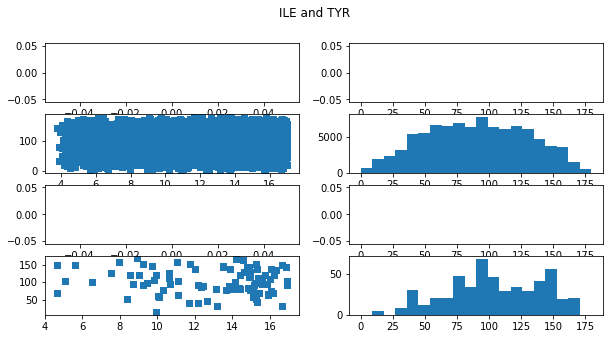

SSH connected
SSH connected
SSH connected
SSH connected


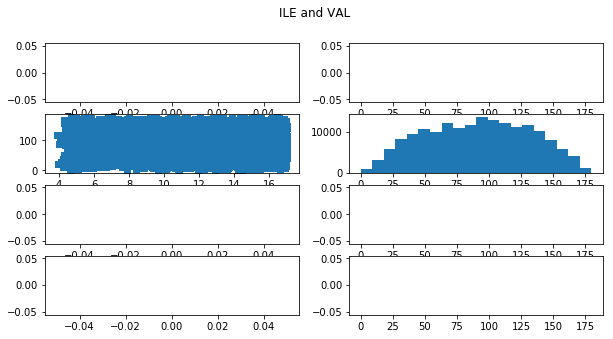

SSH connected
SSH connected
SSH connected
SSH connected


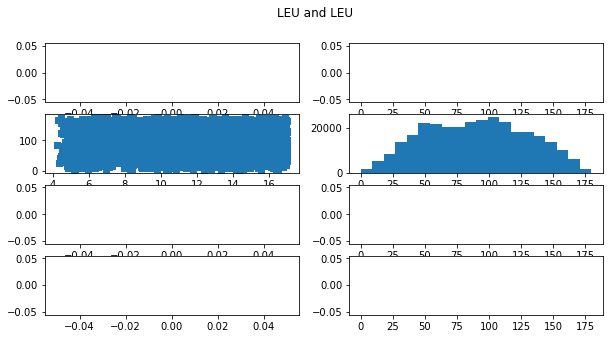

SSH connected
SSH connected
SSH connected
SSH connected


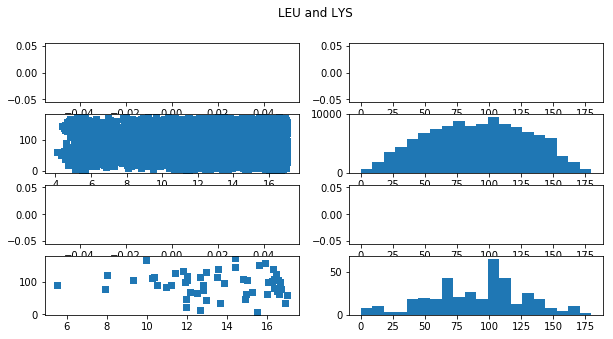

SSH connected
SSH connected
SSH connected
SSH connected


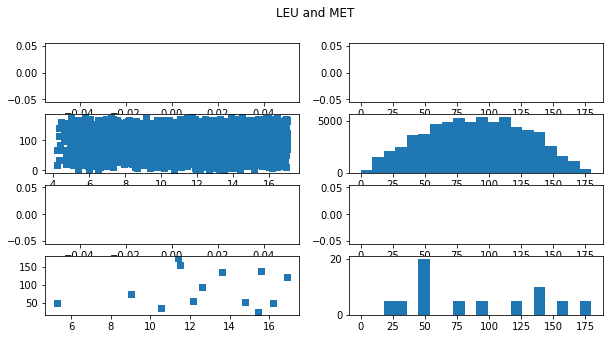

SSH connected
SSH connected
SSH connected
SSH connected


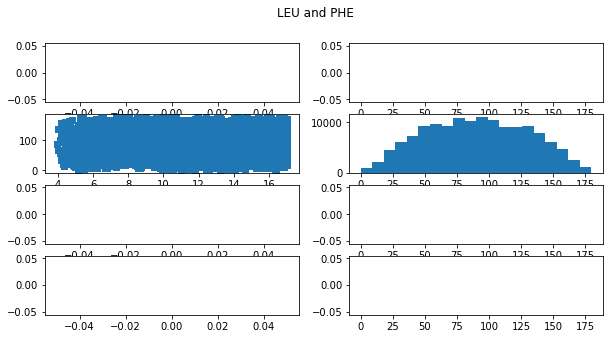

SSH connected
SSH connected
SSH connected
SSH connected


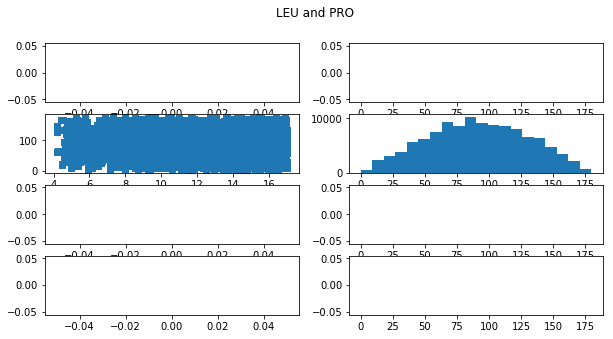

SSH connected
SSH connected
SSH connected
SSH connected


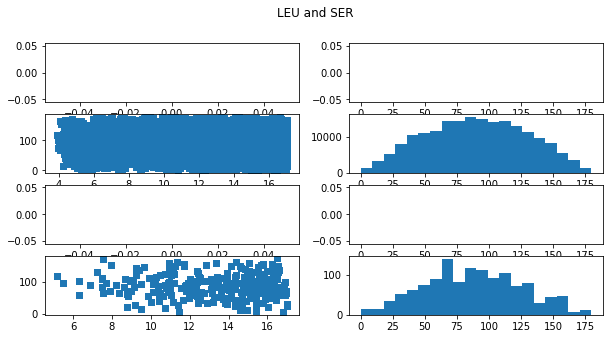

SSH connected
SSH connected
SSH connected
SSH connected


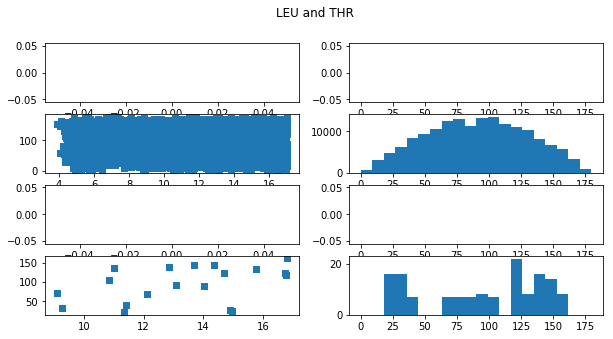

SSH connected
SSH connected
SSH connected
SSH connected


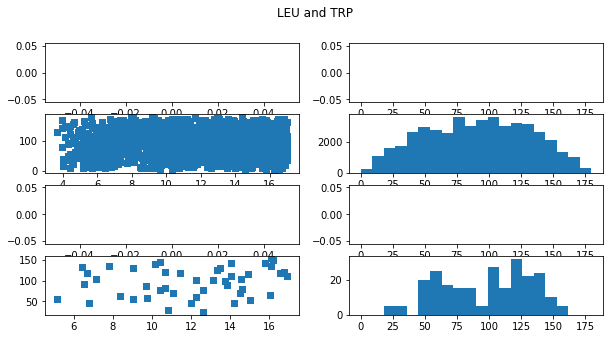

SSH connected
SSH connected
SSH connected
SSH connected


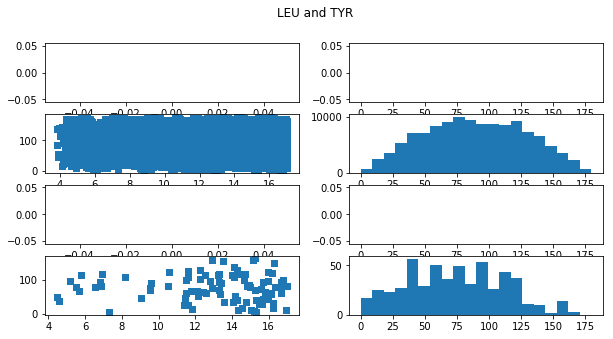

SSH connected
SSH connected
SSH connected
SSH connected


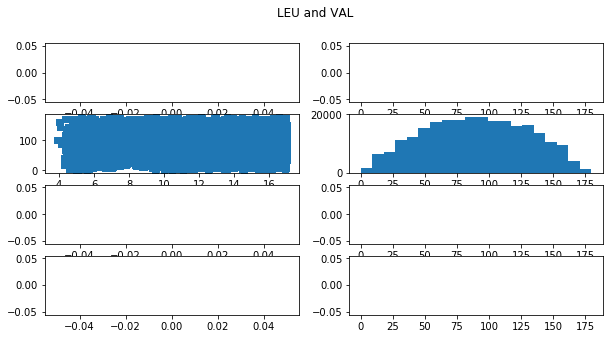

SSH connected
SSH connected
SSH connected
SSH connected


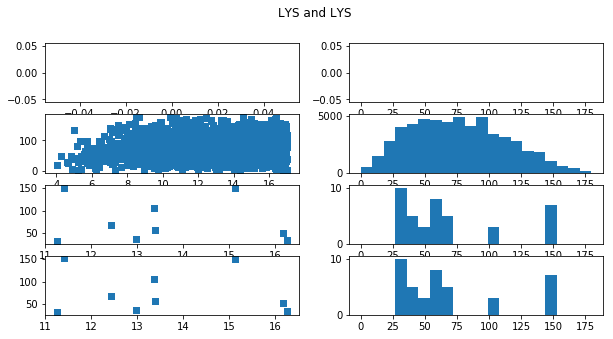

SSH connected
SSH connected
SSH connected
SSH connected


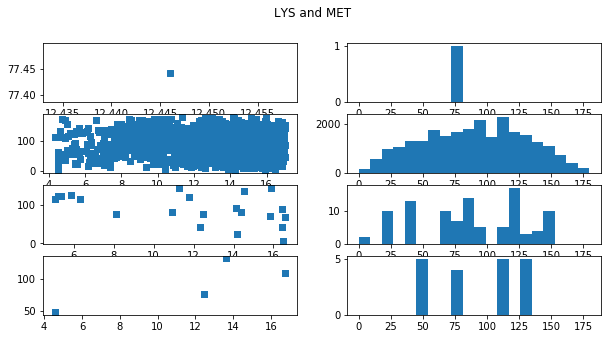

SSH connected
SSH connected
SSH connected
SSH connected


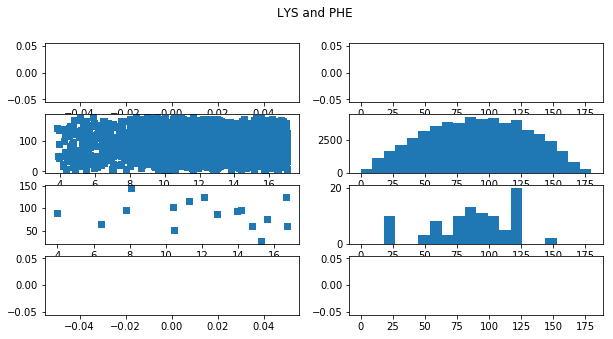

SSH connected
SSH connected
SSH connected
SSH connected


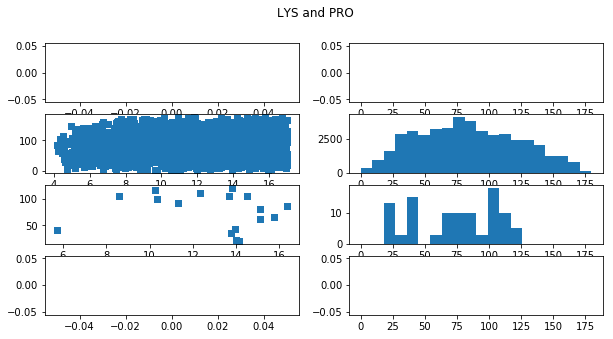

SSH connected
SSH connected
SSH connected
SSH connected


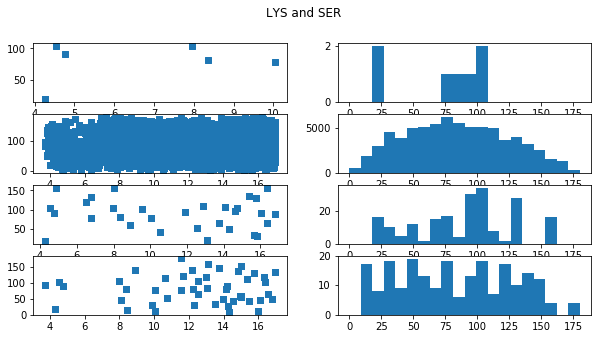

SSH connected
SSH connected
SSH connected
SSH connected


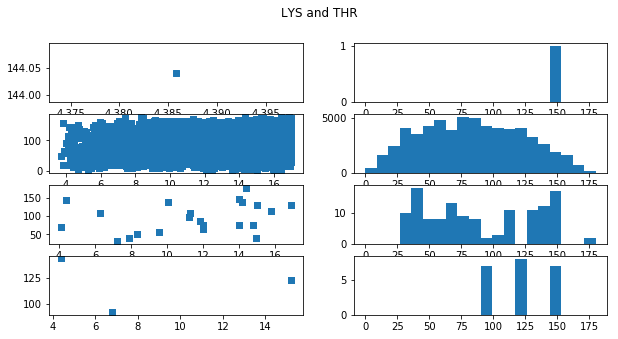

SSH connected
SSH connected
SSH connected
SSH connected


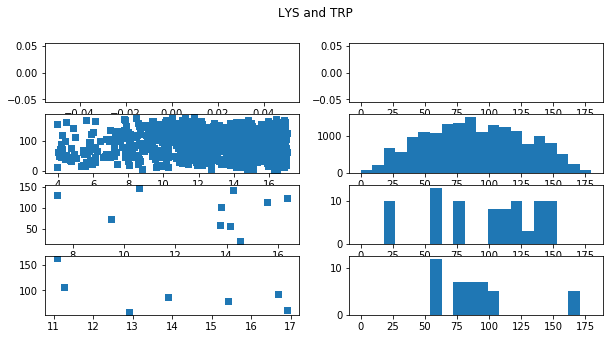

SSH connected
SSH connected
SSH connected
SSH connected


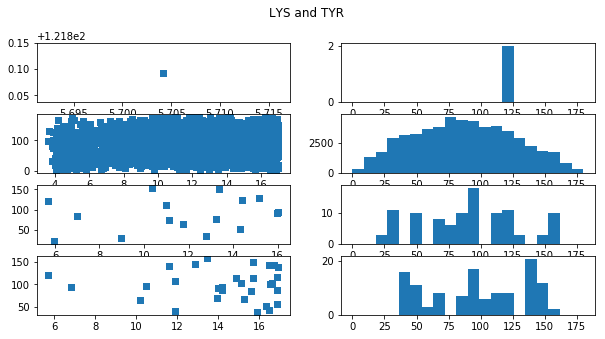

SSH connected
SSH connected
SSH connected
SSH connected


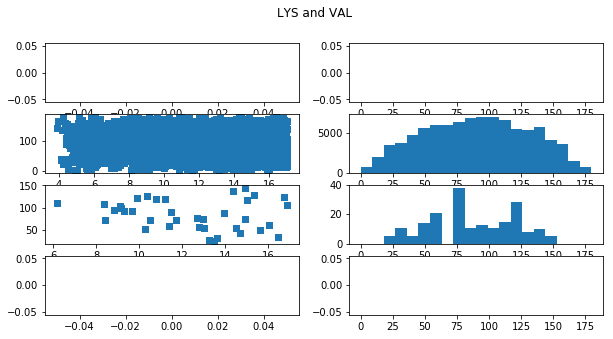

SSH connected
SSH connected
SSH connected
SSH connected


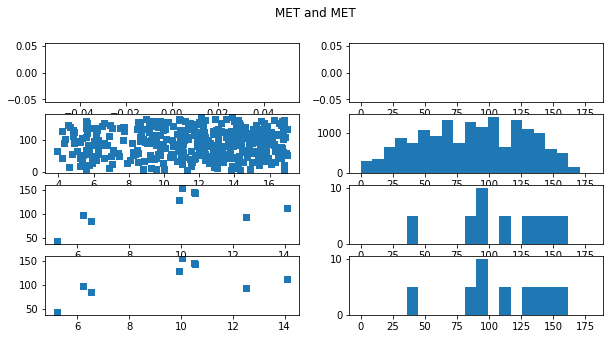

SSH connected
SSH connected
SSH connected
SSH connected


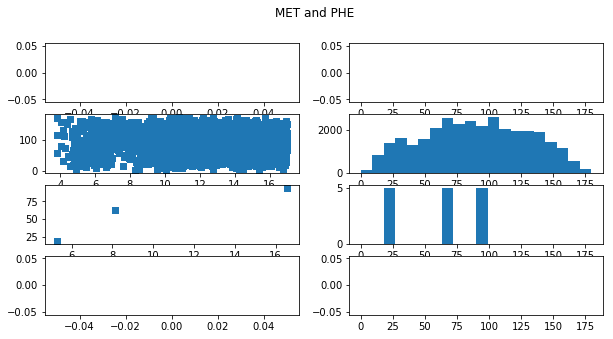

SSH connected
SSH connected
SSH connected
SSH connected


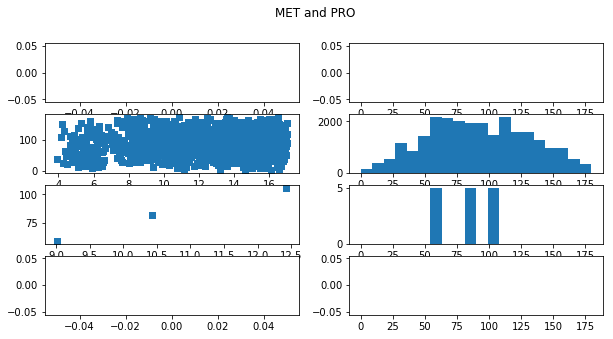

SSH connected
SSH connected
SSH connected
SSH connected


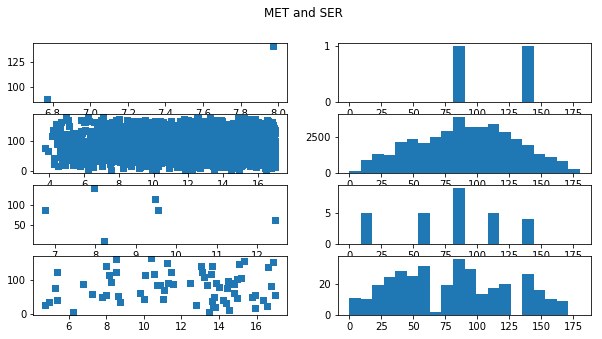

SSH connected
SSH connected
SSH connected
SSH connected


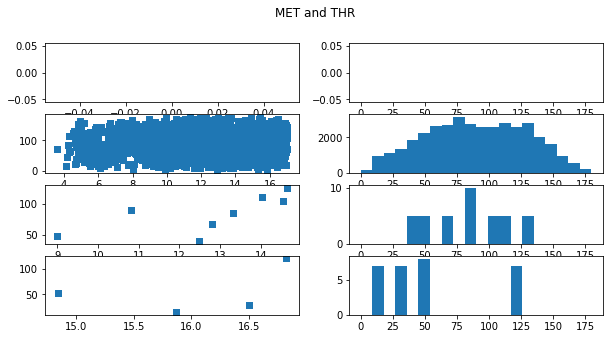

SSH connected
SSH connected
SSH connected
SSH connected


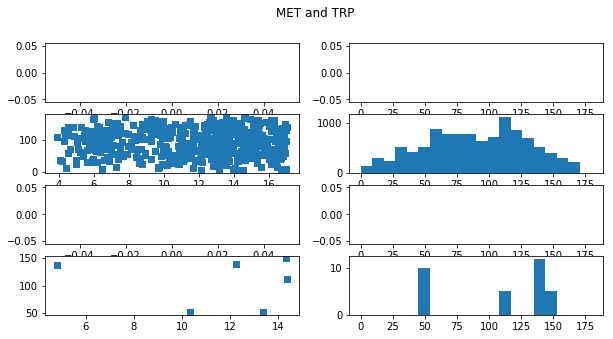

SSH connected
SSH connected
SSH connected
SSH connected


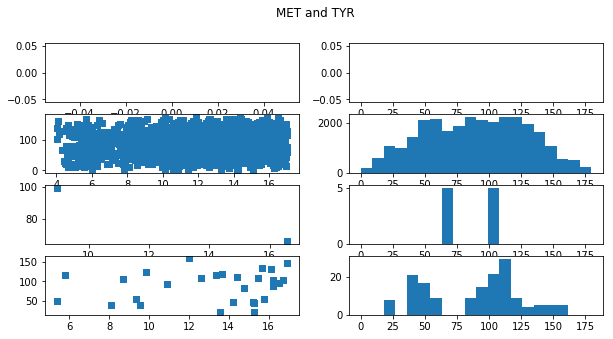

SSH connected
SSH connected
SSH connected
SSH connected


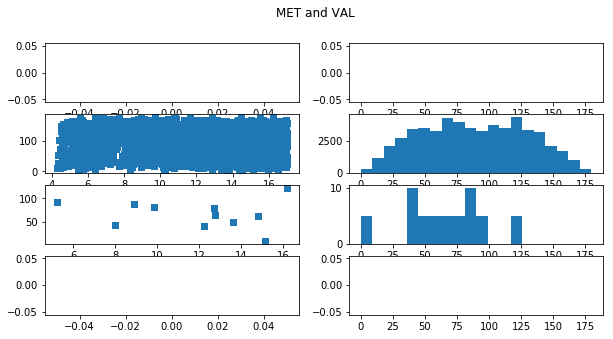

SSH connected
SSH connected
SSH connected
SSH connected


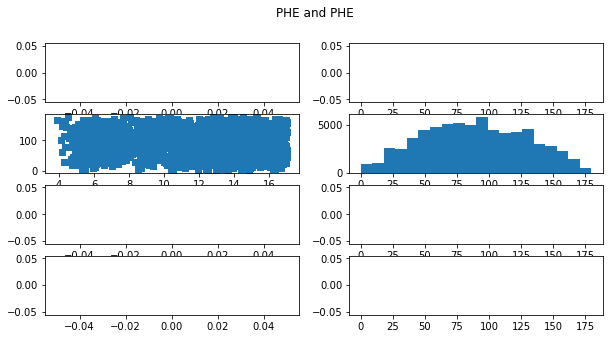

SSH connected
SSH connected
SSH connected
SSH connected


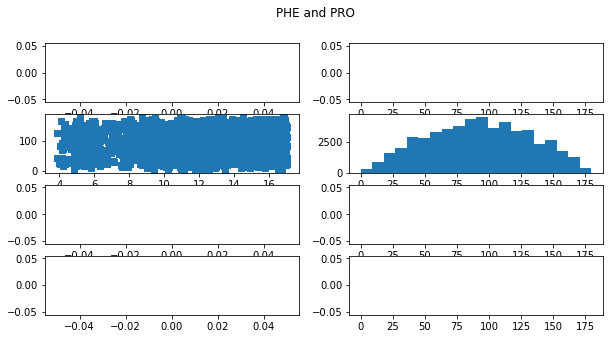

SSH connected
SSH connected
SSH connected
SSH connected


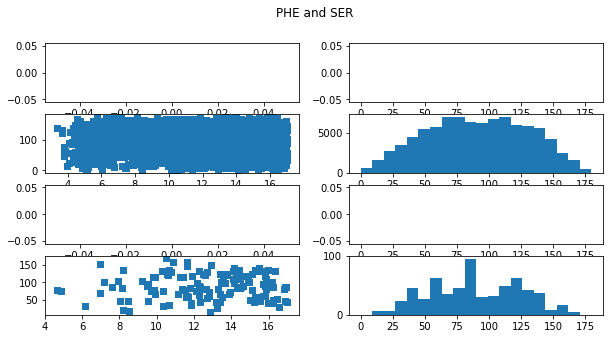

SSH connected
SSH connected
SSH connected
SSH connected


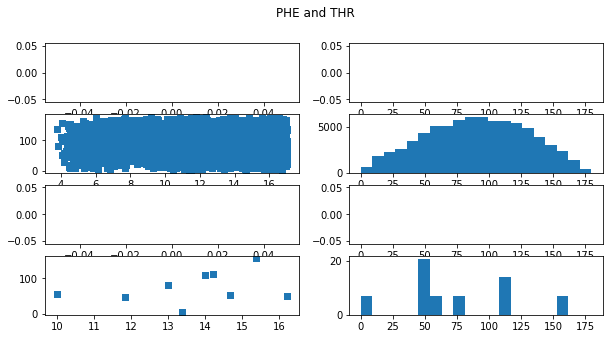

SSH connected
SSH connected
SSH connected
SSH connected


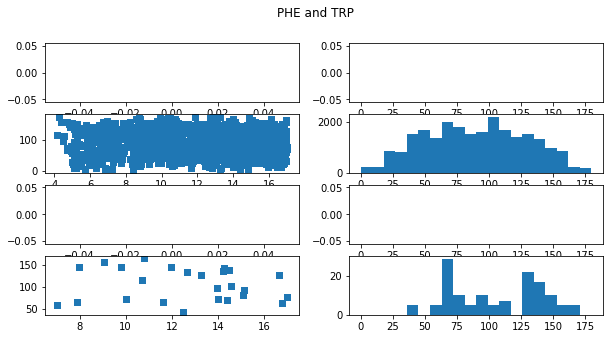

SSH connected
SSH connected
SSH connected
SSH connected


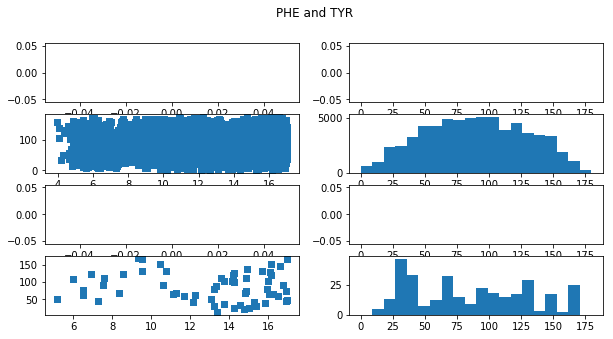

SSH connected
SSH connected
SSH connected
SSH connected


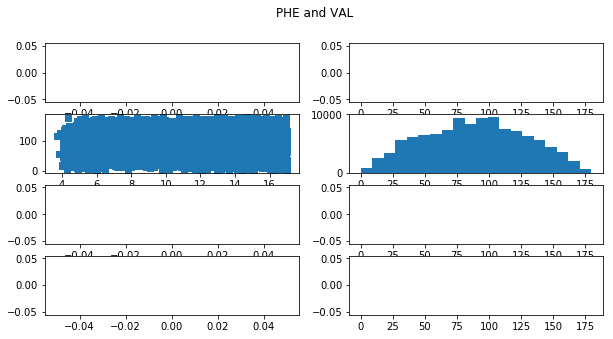

SSH connected
SSH connected
SSH connected
SSH connected


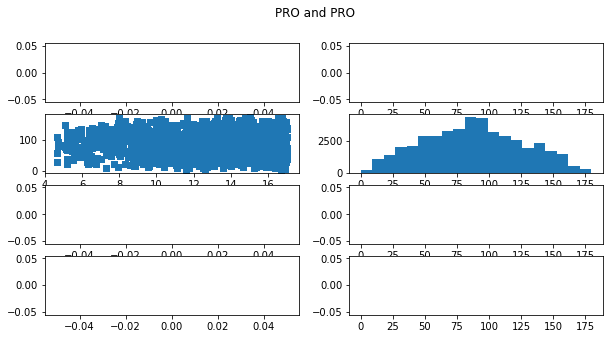

SSH connected
SSH connected
SSH connected
SSH connected


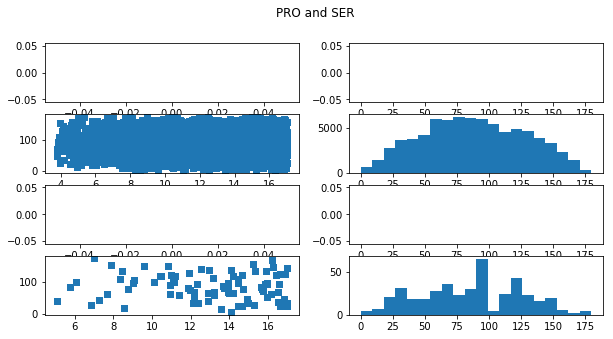

SSH connected
SSH connected
SSH connected
SSH connected


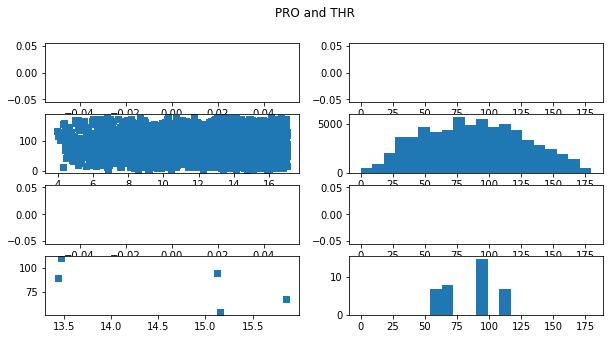

SSH connected
SSH connected
SSH connected
SSH connected


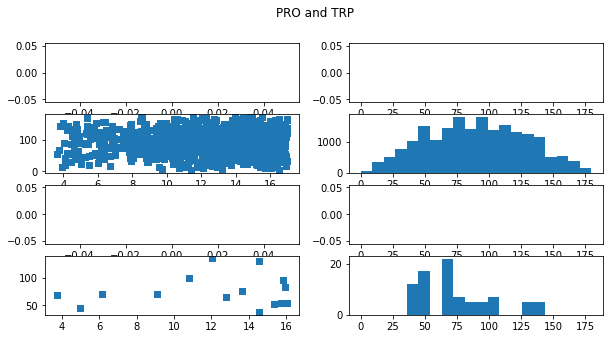

SSH connected
SSH connected
SSH connected
SSH connected


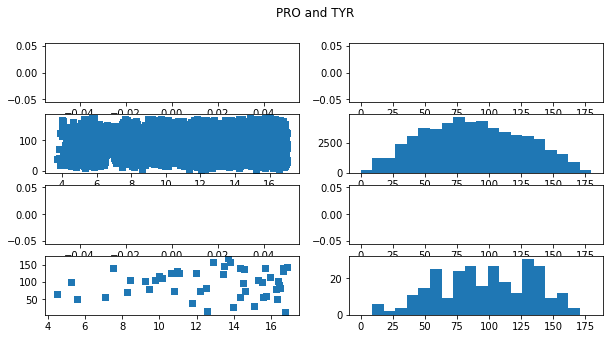

SSH connected
SSH connected
SSH connected
SSH connected


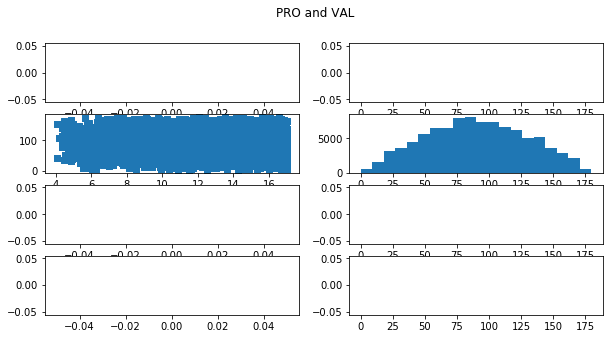

SSH connected
SSH connected
SSH connected
SSH connected


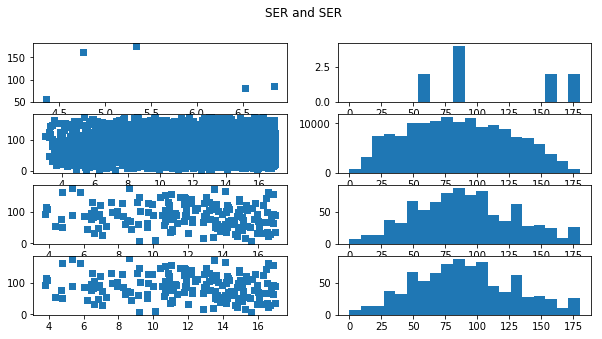

SSH connected
SSH connected
SSH connected
SSH connected


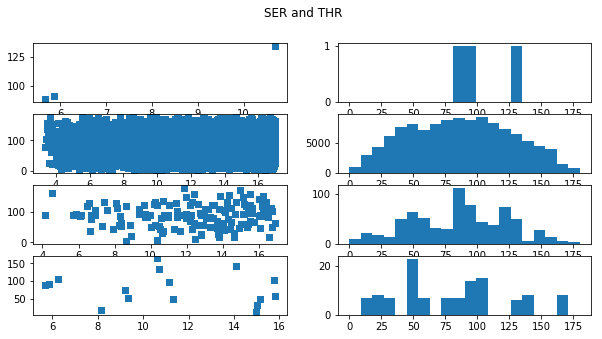

SSH connected
SSH connected
SSH connected
SSH connected


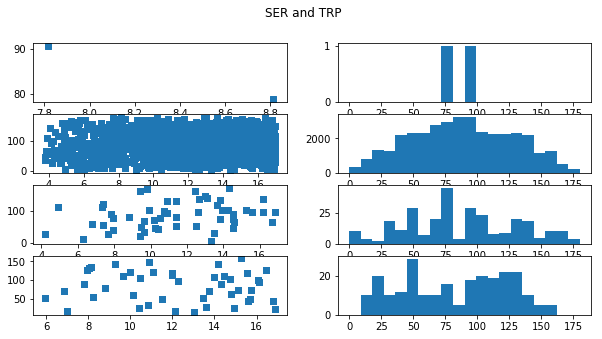

SSH connected
SSH connected
SSH connected
SSH connected


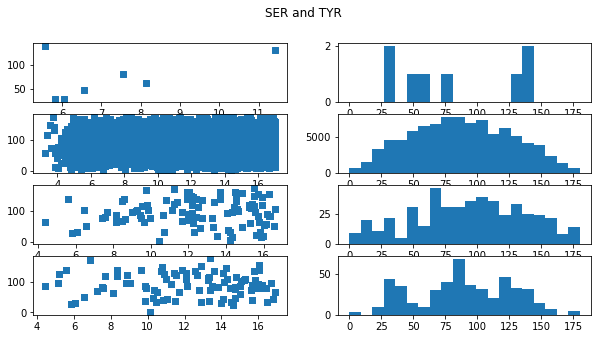

SSH connected
SSH connected
SSH connected
SSH connected


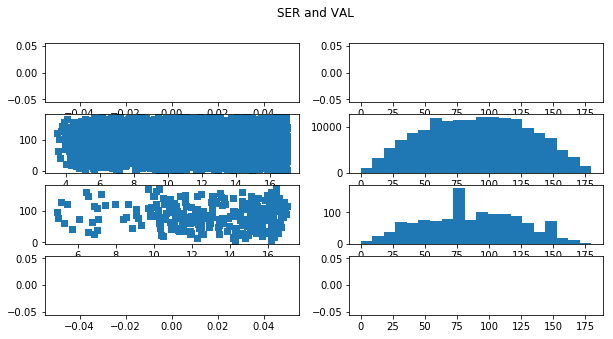

SSH connected
SSH connected
SSH connected
SSH connected


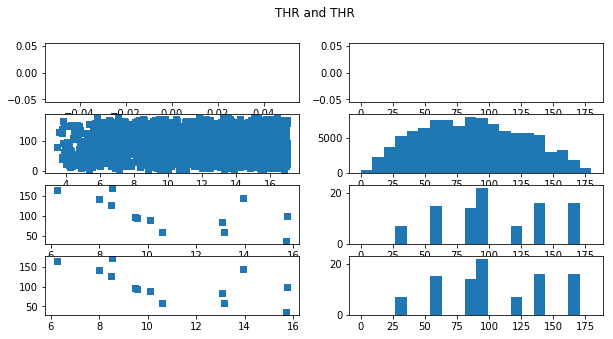

SSH connected
SSH connected
SSH connected
SSH connected


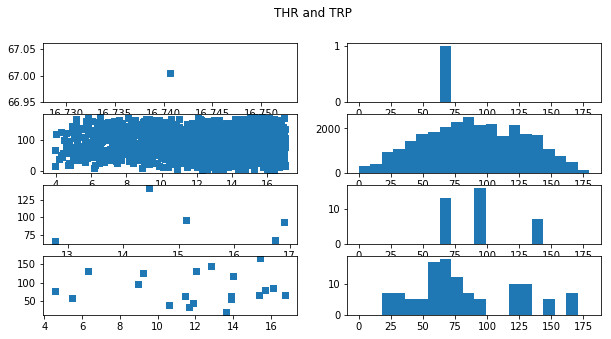

SSH connected
SSH connected
SSH connected
SSH connected


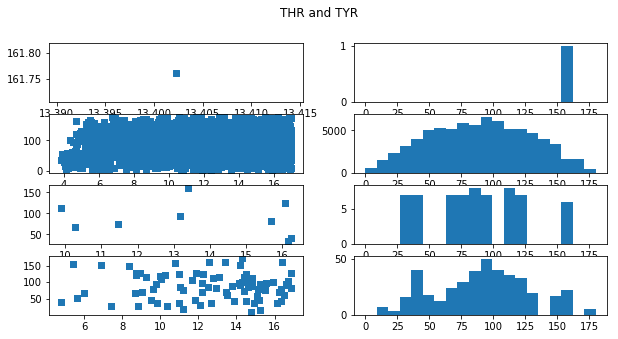

SSH connected
SSH connected
SSH connected
SSH connected


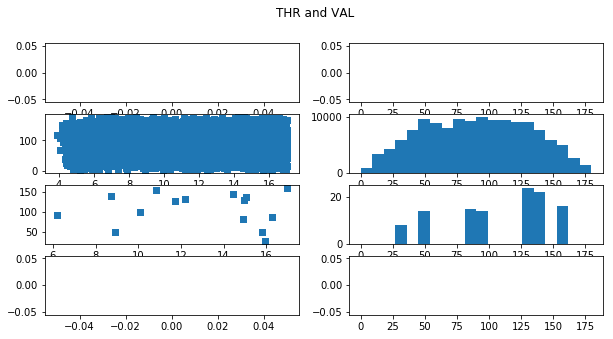

SSH connected
SSH connected
SSH connected
SSH connected


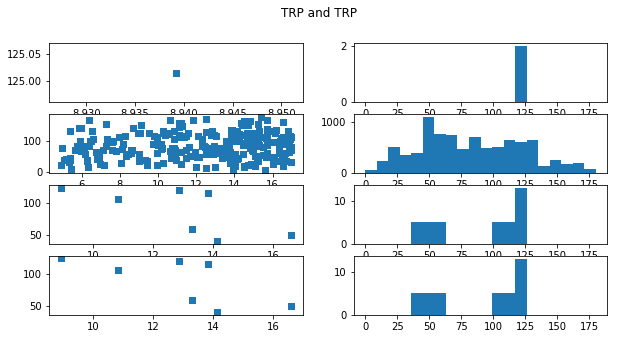

SSH connected
SSH connected
SSH connected
SSH connected


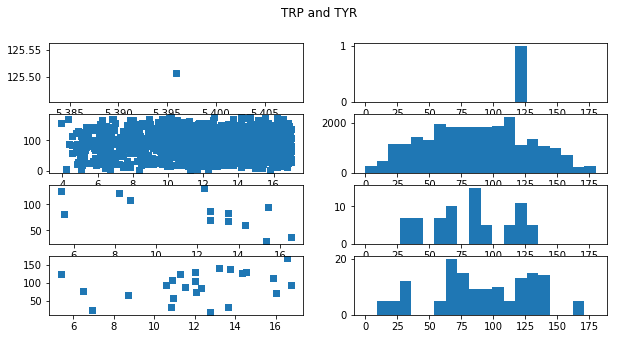

SSH connected
SSH connected
SSH connected
SSH connected


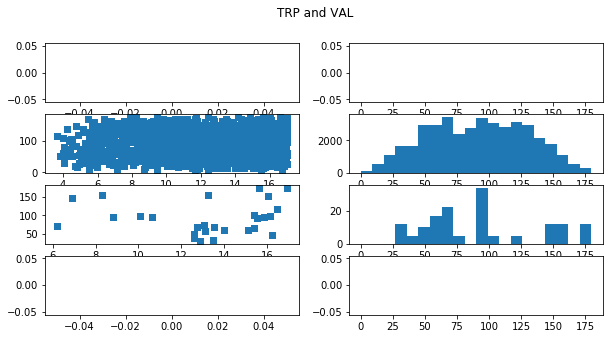

SSH connected
SSH connected
SSH connected
SSH connected


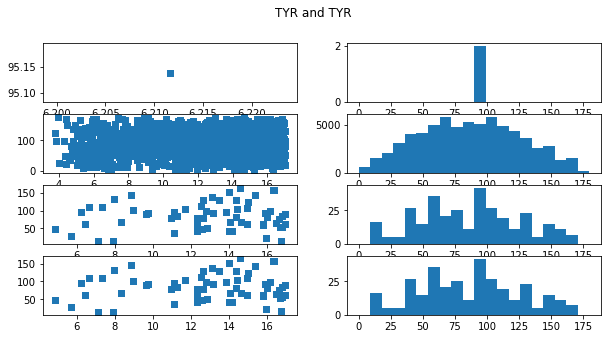

SSH connected
SSH connected
SSH connected
SSH connected


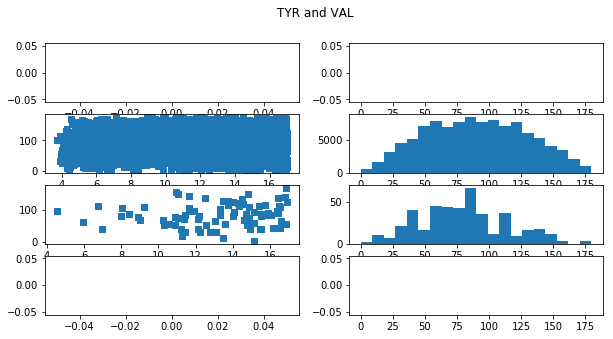

SSH connected
SSH connected
SSH connected
SSH connected


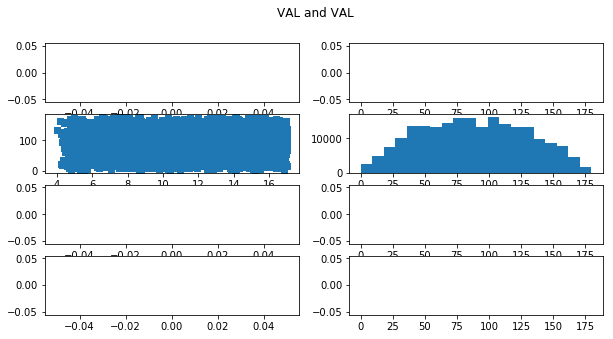

In [154]:
aminoAcidCodes = ["ALA","ARG","ASN","ASP","CYS","GLN","GLY","GLU","HIS","ILE","LEU","LYS",
                 "MET","PHE","PRO","SER","THR","TRP","TYR","VAL"]
for i in range(len(aminoAcidCodes)):
    for j in range(i,len(aminoAcidCodes)):
        residue_1 = aminoAcidCodes[i]
        residue_2 = aminoAcidCodes[j]

        fig, axs = plt.subplots(4, 2,figsize=(10,5))
        fig.suptitle('{} and {}'.format(residue_1,residue_2))

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"=","=")
        active_data = active_data[active_data["Distance"]<17]
        axs[0,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[0,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180)) 

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"!=","!=")
        active_data = active_data[active_data["Distance"]<17]
        axs[1,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[1,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180))

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"=","!=")
        active_data = active_data[active_data["Distance"]<17]
        axs[2,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[2,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180))

        active_data = Two_residues_generic_retrieval(residue_1,residue_2,"!=","=")
        active_data = active_data[active_data["Distance"]<17]
        axs[3,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        axs[3,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180))

        #Two_all_residues_retrieval(residue_1,residue_2)
        #active_data = active_data[active_data["Distance"]<17]
        #axs[4,0].scatter(active_data["Distance"],active_data["Angle"],marker = "s")
        #axs[4,1].hist([float(x) for x in active_data["Angle"]], bins=20,range=(0,180))        
                
        fig.savefig("Y:/Yuan/temp/Two_way_plots/{}_and_{}".format(residue_1,residue_2))
        plt.show()

 Volume in drive E is data
 Volume Serial Number is 7E67-9416

 Directory of E:\docs\YuanFile\Naive\Protein_motif_analysis

09/23/2019  05:18 PM    <DIR>          .
09/23/2019  05:18 PM    <DIR>          ..
09/22/2019  10:46 PM    <DIR>          .ipynb_checkpoints
09/23/2019  03:41 PM           135,700 Plot_residue_clustering.ipynb
09/23/2019  05:18 PM           137,701 Plotting_from_MySQL.ipynb
07/08/2019  01:51 PM            93,174 ProteinBindingSitesMining.ipynb
06/26/2019  09:35 PM            61,200 ProteinSequencePullOut.ipynb
06/26/2019  09:35 PM            54,824 PullOutTableFromMEROPSweb.ipynb
06/30/2019  02:02 PM            14,999 Uniprot2PDB.ipynb
06/26/2019  09:35 PM             6,671 utils_download_protein_properties.ipynb
               7 File(s)        504,269 bytes
               3 Dir(s)  50,592,067,584 bytes free
